<a href="https://colab.research.google.com/github/YXCUC/YXCUC/blob/main/ENDG511_Project_YXC_30088244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENDG511 Project**
## by: Ying Xuan Cao, 30088244
###Summary
In summary, this project was to develop a high accuracy machine learning model for Power System Attack Detection usage. With some difficulty that have took to long to solve, my target change to study how can model size be reduce for a CNN model trained to fit the same power system dataset. One can read the end of section 1 & 2 for what had happened that make me to abandon the original goal
# 0. Import basic library.
 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.0 First attempt with all data from all unit load into one input data package
This dataset is from a small power system with 2 power generators,4 Intelligent Electronic Devices control 4 breaker.<br>
IEDs can turn on/off the breakers when it detected faults, this can be real or faked injected data. Operator can also turn on/off breakers manually for maintenance.<br>
All data are package into 15 .csv files, and each files are n*128 input matrix plus output. All of the .csv files have at least 1% of each scenarios. <br>
In the published paper for this dataset, they said all files are randomly sample. Which later this is going to cause issue that we will cover at the end of section 1.
<br>
System Structure<br>
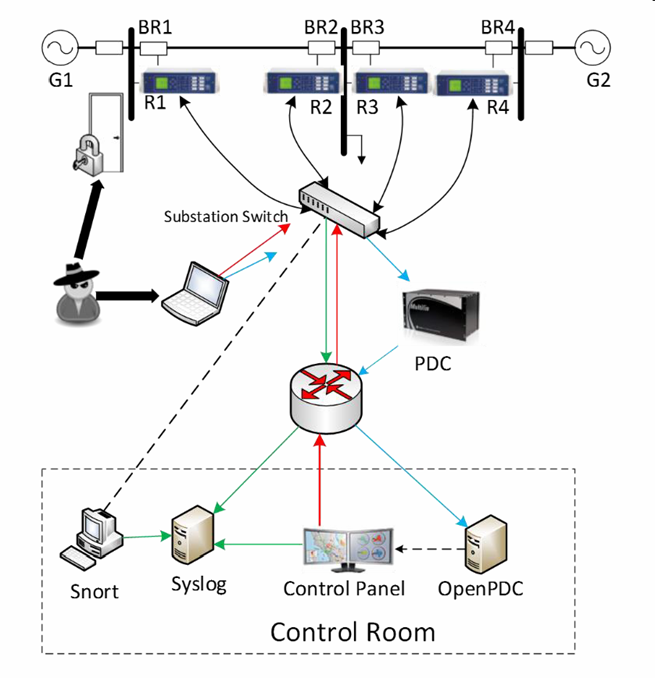
<br>Input features description<br>
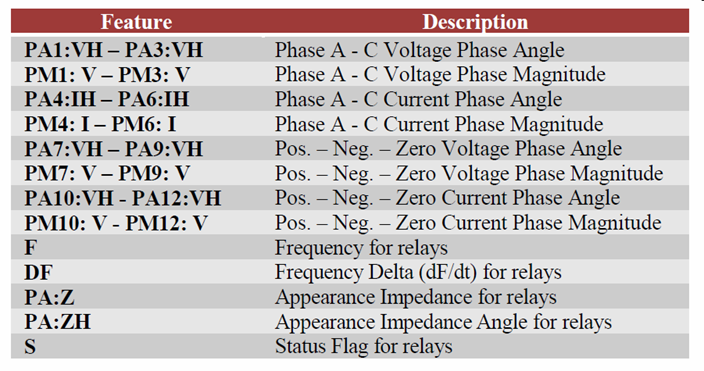
<br>Output Meaning<br>
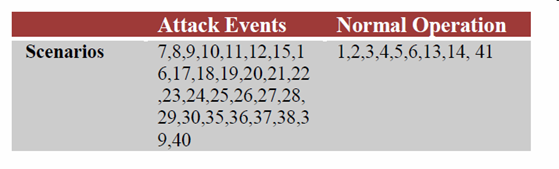
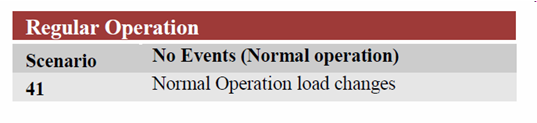
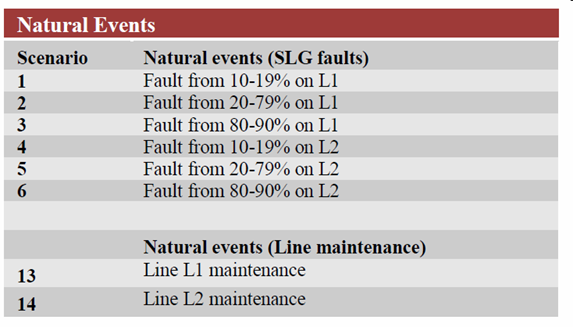
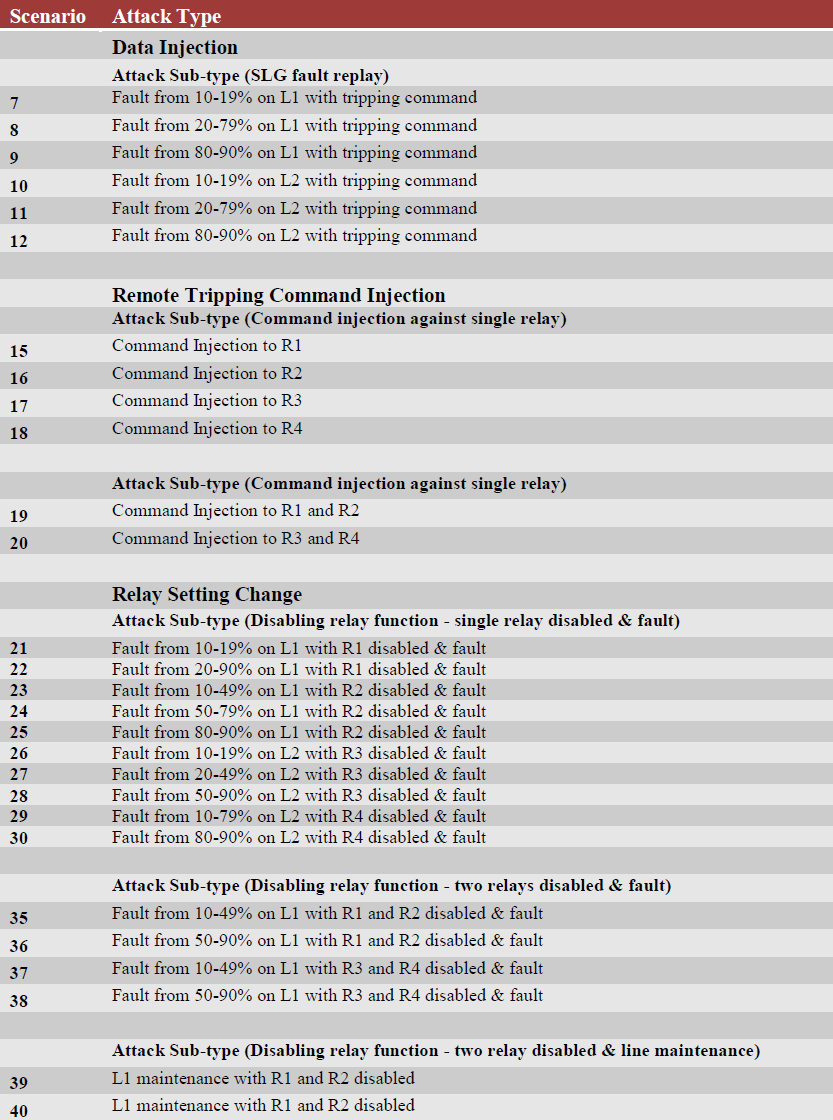


In section 1 I try to use a two levels model to improve the overall accuracy.<br>
data1 package is used to train the first level models, and the first level trained model is used to generate a pridiction as data2 package as input. at the end I used output of the prediction and real output matix to train the second level model.
<br>
After all this, I use data3 input to test the combined model.
<br>
I use this methods because some modeling method seen like that always mistaken some of the events. By combining mutiple difference models. There should be a improvement in accuracy.
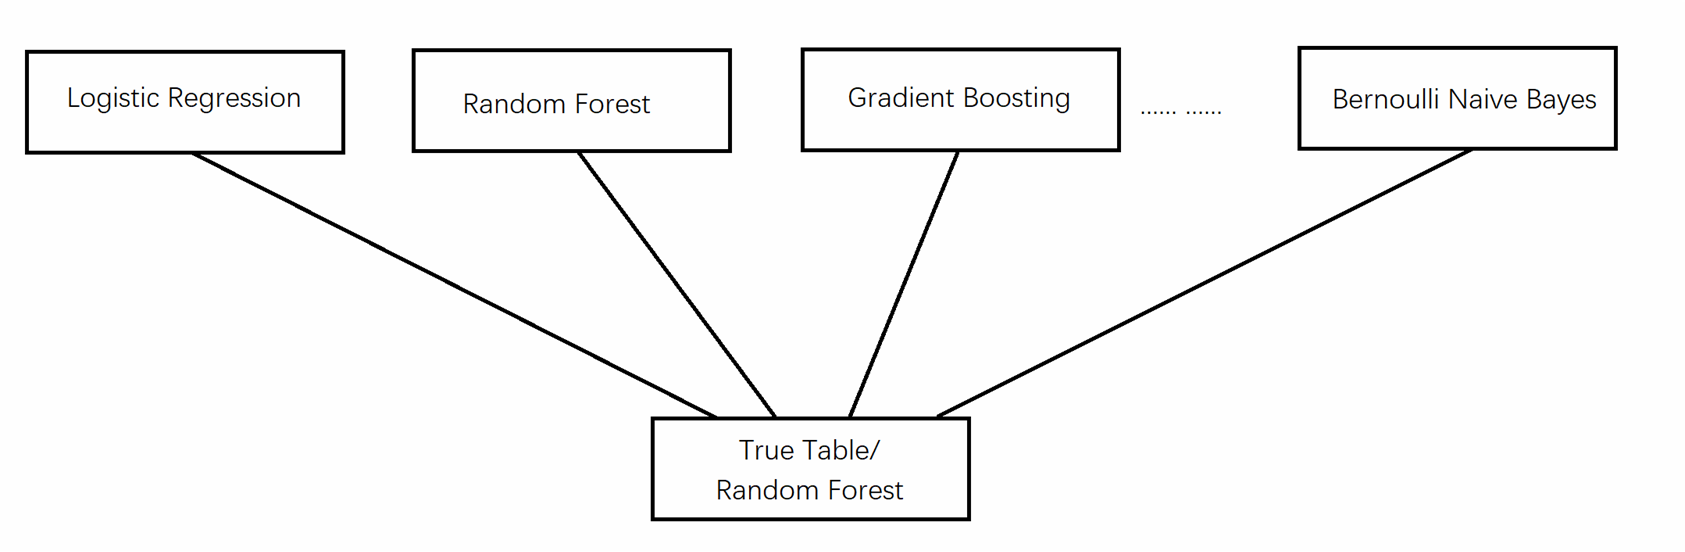

##1.1.1 Load CPPS data

In [ ]:
from scipy.io.arff import loadarff 
raw_data = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data1 Sampled Scenarios.csv.arff')
data = pd.DataFrame(raw_data[0])
data.fillna(0).describe()
data.replace([np.inf, -np.inf], 0, inplace=True)
print(data.shape)
raw_data2 = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data2 Sampled Scenarios.csv.arff')
data2 = pd.DataFrame(raw_data2[0])
data2.fillna(0).describe()
data2.replace([np.inf, -np.inf], 0, inplace=True)
print(data2.shape)
raw_data3 = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data3 Sampled Scenarios.csv.arff')
data3 = pd.DataFrame(raw_data3[0])
data3.fillna(0).describe()
data3.replace([np.inf, -np.inf], 0, inplace=True)
print(data3.shape)

(4966, 129)
(5069, 129)
(5415, 129)


In [ ]:
datab = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data1.csv', na_values='?')
datab.fillna(0).describe()
datab.replace([np.inf, -np.inf], 0, inplace=True)
print(datab.shape)
datab2 = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data2.csv', na_values='?')
datab2.fillna(0).describe()
datab2.replace([np.inf, -np.inf], 0, inplace=True)
print(datab2.shape)
datab3 = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data3.csv', na_values='?')
datab3.fillna(0).describe()
datab3.replace([np.inf, -np.inf], 0, inplace=True)
print(datab3.shape)

(4966, 129)
(5069, 129)
(5415, 129)


##1.1.2 Split data into X and Y

In [ ]:
X = datab[['R1-PA1:VH','R1-PM1:V','R1-PA2:VH','R1-PM2:V','R1-PA3:VH','R1-PM3:V','R1-PA4:IH','R1-PM4:I','R1-PA5:IH','R1-PM5:I','R1-PA6:IH','R1-PM6:I','R1-PA7:VH','R1-PM7:V','R1-PA8:VH','R1-PM8:V','R1-PA9:VH','R1-PM9:V','R1-PA10:IH','R1-PM10:I','R1-PA11:IH','R1-PM11:I','R1-PA12:IH','R1-PM12:I','R1:F','R1:DF','R1-PA:Z','R1-PA:ZH','R1:S','R2-PA1:VH','R2-PM1:V','R2-PA2:VH','R2-PM2:V','R2-PA3:VH','R2-PM3:V','R2-PA4:IH','R2-PM4:I','R2-PA5:IH','R2-PM5:I','R2-PA6:IH','R2-PM6:I','R2-PA7:VH','R2-PM7:V','R2-PA8:VH','R2-PM8:V','R2-PA9:VH','R2-PM9:V','R2-PA10:IH','R2-PM10:I','R2-PA11:IH','R2-PM11:I','R2-PA12:IH','R2-PM12:I','R2:F','R2:DF','R2-PA:Z','R2-PA:ZH','R2:S','R3-PA1:VH','R3-PM1:V','R3-PA2:VH','R3-PM2:V','R3-PA3:VH','R3-PM3:V','R3-PA4:IH','R3-PM4:I','R3-PA5:IH','R3-PM5:I','R3-PA6:IH','R3-PM6:I','R3-PA7:VH','R3-PM7:V','R3-PA8:VH','R3-PM8:V','R3-PA9:VH','R3-PM9:V','R3-PA10:IH','R3-PM10:I','R3-PA11:IH','R3-PM11:I','R3-PA12:IH','R3-PM12:I','R3:F','R3:DF','R3-PA:Z','R3-PA:ZH','R3:S','R4-PA1:VH','R4-PM1:V','R4-PA2:VH','R4-PM2:V','R4-PA3:VH','R4-PM3:V','R4-PA4:IH','R4-PM4:I','R4-PA5:IH','R4-PM5:I','R4-PA6:IH','R4-PM6:I','R4-PA7:VH','R4-PM7:V','R4-PA8:VH','R4-PM8:V','R4-PA9:VH','R4-PM9:V','R4-PA10:IH','R4-PM10:I','R4-PA11:IH','R4-PM11:I','R4-PA12:IH','R4-PM12:I','R4:F','R4:DF','R4-PA:Z','R4-PA:ZH','R4:S','control_panel_log1','control_panel_log2','control_panel_log3','control_panel_log4','relay1_log','relay2_log','relay3_log','relay4_log','snort_log1','snort_log2','snort_log3','snort_log4']]
y = data['marker']
yb = datab['marker']
X2 = datab2[['R1-PA1:VH','R1-PM1:V','R1-PA2:VH','R1-PM2:V','R1-PA3:VH','R1-PM3:V','R1-PA4:IH','R1-PM4:I','R1-PA5:IH','R1-PM5:I','R1-PA6:IH','R1-PM6:I','R1-PA7:VH','R1-PM7:V','R1-PA8:VH','R1-PM8:V','R1-PA9:VH','R1-PM9:V','R1-PA10:IH','R1-PM10:I','R1-PA11:IH','R1-PM11:I','R1-PA12:IH','R1-PM12:I','R1:F','R1:DF','R1-PA:Z','R1-PA:ZH','R1:S','R2-PA1:VH','R2-PM1:V','R2-PA2:VH','R2-PM2:V','R2-PA3:VH','R2-PM3:V','R2-PA4:IH','R2-PM4:I','R2-PA5:IH','R2-PM5:I','R2-PA6:IH','R2-PM6:I','R2-PA7:VH','R2-PM7:V','R2-PA8:VH','R2-PM8:V','R2-PA9:VH','R2-PM9:V','R2-PA10:IH','R2-PM10:I','R2-PA11:IH','R2-PM11:I','R2-PA12:IH','R2-PM12:I','R2:F','R2:DF','R2-PA:Z','R2-PA:ZH','R2:S','R3-PA1:VH','R3-PM1:V','R3-PA2:VH','R3-PM2:V','R3-PA3:VH','R3-PM3:V','R3-PA4:IH','R3-PM4:I','R3-PA5:IH','R3-PM5:I','R3-PA6:IH','R3-PM6:I','R3-PA7:VH','R3-PM7:V','R3-PA8:VH','R3-PM8:V','R3-PA9:VH','R3-PM9:V','R3-PA10:IH','R3-PM10:I','R3-PA11:IH','R3-PM11:I','R3-PA12:IH','R3-PM12:I','R3:F','R3:DF','R3-PA:Z','R3-PA:ZH','R3:S','R4-PA1:VH','R4-PM1:V','R4-PA2:VH','R4-PM2:V','R4-PA3:VH','R4-PM3:V','R4-PA4:IH','R4-PM4:I','R4-PA5:IH','R4-PM5:I','R4-PA6:IH','R4-PM6:I','R4-PA7:VH','R4-PM7:V','R4-PA8:VH','R4-PM8:V','R4-PA9:VH','R4-PM9:V','R4-PA10:IH','R4-PM10:I','R4-PA11:IH','R4-PM11:I','R4-PA12:IH','R4-PM12:I','R4:F','R4:DF','R4-PA:Z','R4-PA:ZH','R4:S','control_panel_log1','control_panel_log2','control_panel_log3','control_panel_log4','relay1_log','relay2_log','relay3_log','relay4_log','snort_log1','snort_log2','snort_log3','snort_log4']]
y2 = data2['marker']
yb2 = datab2['marker']
X3 = datab3[['R1-PA1:VH','R1-PM1:V','R1-PA2:VH','R1-PM2:V','R1-PA3:VH','R1-PM3:V','R1-PA4:IH','R1-PM4:I','R1-PA5:IH','R1-PM5:I','R1-PA6:IH','R1-PM6:I','R1-PA7:VH','R1-PM7:V','R1-PA8:VH','R1-PM8:V','R1-PA9:VH','R1-PM9:V','R1-PA10:IH','R1-PM10:I','R1-PA11:IH','R1-PM11:I','R1-PA12:IH','R1-PM12:I','R1:F','R1:DF','R1-PA:Z','R1-PA:ZH','R1:S','R2-PA1:VH','R2-PM1:V','R2-PA2:VH','R2-PM2:V','R2-PA3:VH','R2-PM3:V','R2-PA4:IH','R2-PM4:I','R2-PA5:IH','R2-PM5:I','R2-PA6:IH','R2-PM6:I','R2-PA7:VH','R2-PM7:V','R2-PA8:VH','R2-PM8:V','R2-PA9:VH','R2-PM9:V','R2-PA10:IH','R2-PM10:I','R2-PA11:IH','R2-PM11:I','R2-PA12:IH','R2-PM12:I','R2:F','R2:DF','R2-PA:Z','R2-PA:ZH','R2:S','R3-PA1:VH','R3-PM1:V','R3-PA2:VH','R3-PM2:V','R3-PA3:VH','R3-PM3:V','R3-PA4:IH','R3-PM4:I','R3-PA5:IH','R3-PM5:I','R3-PA6:IH','R3-PM6:I','R3-PA7:VH','R3-PM7:V','R3-PA8:VH','R3-PM8:V','R3-PA9:VH','R3-PM9:V','R3-PA10:IH','R3-PM10:I','R3-PA11:IH','R3-PM11:I','R3-PA12:IH','R3-PM12:I','R3:F','R3:DF','R3-PA:Z','R3-PA:ZH','R3:S','R4-PA1:VH','R4-PM1:V','R4-PA2:VH','R4-PM2:V','R4-PA3:VH','R4-PM3:V','R4-PA4:IH','R4-PM4:I','R4-PA5:IH','R4-PM5:I','R4-PA6:IH','R4-PM6:I','R4-PA7:VH','R4-PM7:V','R4-PA8:VH','R4-PM8:V','R4-PA9:VH','R4-PM9:V','R4-PA10:IH','R4-PM10:I','R4-PA11:IH','R4-PM11:I','R4-PA12:IH','R4-PM12:I','R4:F','R4:DF','R4-PA:Z','R4-PA:ZH','R4:S','control_panel_log1','control_panel_log2','control_panel_log3','control_panel_log4','relay1_log','relay2_log','relay3_log','relay4_log','snort_log1','snort_log2','snort_log3','snort_log4']]
y3 = data3['marker']
yb3 = datab3['marker']
print(X.shape)
print(y.shape)
print(X2.shape)
print(y2.shape)
print(X3.shape)
print(y3.shape)

(4966, 128)
(4966,)
(5069, 128)
(5069,)
(5415, 128)
(5415,)


In [ ]:
y

0       b'41'
1       b'41'
2       b'41'
3       b'41'
4       b'41'
        ...  
4961     b'1'
4962     b'1'
4963     b'1'
4964     b'1'
4965     b'1'
Name: marker, Length: 4966, dtype: object

In [ ]:
X.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,...,4966.0,4966.0,4966.000000,4966.000000,4966.000000,4966.000000,4966.0,4966.0,4966.0,4966.0
mean,-17.925492,130994.354960,8.610555,131258.159486,1.681621,131575.619600,-17.467920,397.526132,10.507730,390.915035,...,0.0,0.0,0.037857,0.022755,0.018526,0.029803,0.0,0.0,0.0,0.0
std,98.099812,6545.849798,115.044643,2692.553537,96.408966,2772.274253,97.437891,181.156073,111.699778,143.141274,...,0.0,0.0,0.190871,0.149136,0.134857,0.170060,0.0,0.0,0.0,0.0
min,-179.988962,24998.050190,-179.994691,102449.381200,-179.960314,98161.852050,-179.988962,0.000000,-179.736860,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,-97.404258,131007.835800,-99.085889,130706.956500,-77.405166,131064.250625,-97.626279,317.146520,-90.269501,325.844245,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,-35.864293,131634.667500,17.077007,131333.788300,14.080438,131684.814000,-33.369062,389.658080,6.720795,391.855400,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,71.277382,132136.132900,116.783123,131835.253700,77.995312,132211.352700,67.545994,464.321183,115.522615,469.127820,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,179.994691,146302.530500,179.971773,146327.603700,179.966044,146452.970100,179.925936,1771.039920,179.988962,1263.642110,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [ ]:
X

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,28.229631,130882.4694,-91.730543,130882.4694,148.264289,130957.6892,25.553918,459.42299,-95.683952,466.93050,...,0,0,0,0,0,0,0,0,0,0
4962,28.195253,130957.6892,-91.770650,130932.6159,148.224182,131032.9090,25.267439,460.70476,-95.752707,467.66294,...,0,0,0,0,0,0,0,0,0,0
4963,28.000447,131057.9823,-91.971185,131057.9823,148.035105,131133.2021,24.316329,464.36696,-96.251180,468.94471,...,0,0,0,0,0,0,0,0,0,0
4964,27.971800,131083.0556,-91.994104,131057.9823,148.006458,131133.2021,24.259033,464.18385,-96.314205,469.12782,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X2

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,-26.247197,130681.8832,-146.224559,130656.8100,93.781732,130757.1031,-24.287681,390.75674,-148.688277,414.92726,...,0,0,0,0,0,0,0,0,0,0
1,-28.441625,130255.6377,-148.413258,130230.5644,91.581574,130330.8575,-29.375546,458.69055,-152.498447,477.73399,...,0,0,0,0,0,0,0,0,0,0
2,-28.968746,130431.1505,-148.951838,130431.1505,91.054453,130506.3704,-29.971422,458.87366,-153.048486,477.36777,...,0,0,0,0,0,0,0,0,0,0
3,-29.163552,130456.2238,-149.146644,130406.0773,90.848188,130506.3704,-30.263631,459.42299,-153.214644,477.18466,...,0,0,0,0,0,0,0,0,0,0
4,-29.461490,130406.0773,-149.438852,130381.0040,90.561709,130456.2238,-30.825129,461.07098,-153.638633,478.28332,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,143.428525,130381.0040,23.445433,130330.8575,-96.543388,130456.2238,141.360147,486.15705,19.738396,494.76322,...,0,0,0,0,0,0,0,0,0,0
5065,143.411336,130506.3704,23.433974,130481.2971,-96.554848,130581.5902,140.884592,489.08681,19.406081,496.77743,...,0,0,0,0,0,0,0,0,0,0
5066,143.227990,130782.1763,23.256357,130757.1031,-96.749653,130857.3961,139.435009,496.41121,18.603940,500.43963,...,0,0,0,0,0,0,0,0,0,0
5067,143.147775,130782.1763,23.170413,130782.1763,-96.824138,130882.4694,139.119882,497.87609,18.351838,501.35518,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X3

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,...,0,0,0,0,0,0,0,0,0,0
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982442,131459.1546,77.933719,264.04462,-48.013863,282.90495,...,0,0,0,0,0,0,0,0,0,0
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,...,0,0,0,0,0,0,0,0,0,0
3,74.702237,132261.4993,-45.269395,132211.3527,-165.281135,132311.6458,77.435246,277.41165,-44.581846,281.98940,...,0,0,0,0,0,0,0,0,0,0
4,74.633482,132236.4260,-45.361069,132186.2794,-165.361349,132311.6458,77.034176,278.51031,-44.696438,282.17251,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,132.702755,131308.7150,12.725393,131283.6417,-107.274888,131383.9348,137.051505,322.09049,17.194463,322.45671,...,0,0,0,0,0,0,0,0,0,0
5411,131.980828,131835.2537,11.992007,131835.2537,-107.979626,131935.5467,132.061042,337.47173,11.946170,338.38728,...,0,0,0,0,0,0,0,0,0,0
5412,131.780293,131885.4002,11.802931,131860.3269,-108.191620,131960.6200,131.379222,338.75350,11.258621,339.85216,...,0,0,0,0,0,0,0,0,0,0
5413,131.757375,131885.4002,11.762824,131860.3269,-108.214539,131985.6933,131.270360,339.11972,11.241432,340.03527,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Modified lables into int so the model can handle them easier.
def ymod(yi):
  y = yi.copy()
  y[y == 'b\'1\''] = 1
  y[y == 'b\'2\''] = 2
  y[y == 'b\'3\''] = 3
  y[y == 'b\'4\''] = 4
  y[y == 'b\'5\''] = 5
  y[y == 'b\'6\''] = 6
  y[y == 'b\'7\''] = 7
  y[y == 'b\'8\''] = 8
  y[y == 'b\'9\''] = 9
  y[y == 'b\'10\''] = 10
  y[y == 'b\'11\''] = 11
  y[y == 'b\'12\''] = 12
  y[y == 'b\'13\''] = 13
  y[y == 'b\'14\''] = 14
  y[y == 'b\'15\''] = 15
  y[y == 'b\'16\''] = 16
  y[y == 'b\'17\''] = 17
  y[y == 'b\'18\''] = 18
  y[y == 'b\'19\''] = 19
  y[y == 'b\'20\''] = 20
  y[y == 'b\'21\''] = 21
  y[y == 'b\'22\''] = 22
  y[y == 'b\'23\''] = 23
  y[y == 'b\'24\''] = 24
  y[y == 'b\'25\''] = 25
  y[y == 'b\'26\''] = 26
  y[y == 'b\'27\''] = 27
  y[y == 'b\'28\''] = 28
  y[y == 'b\'29\''] = 29
  y[y == 'b\'30\''] = 30
  y[y == 'b\'31\''] = 31
  y[y == 'b\'32\''] = 32
  y[y == 'b\'33\''] = 33
  y[y == 'b\'34\''] = 34
  y[y == 'b\'35\''] = 35
  y[y == 'b\'36\''] = 36
  y[y == 'b\'37\''] = 37
  y[y == 'b\'38\''] = 38
  y[y == 'b\'39\''] = 39
  y[y == 'b\'40\''] = 40
  y[y == 'b\'41\''] = 41
  y=y.astype('int')
  return y


In [ ]:
y=ymod(y)
y2=ymod(y2)
y3=ymod(y3)

In [ ]:
count = 1
for i in range(1,42):
  print('y[y == \''+'b\\\''+str(i)+'\\\'\'] = '+str(i))

##1.1.3 Train a classifier model with clasic ML model with muticlass and binary output

training score is: 0.073, validation score is: 0.027.


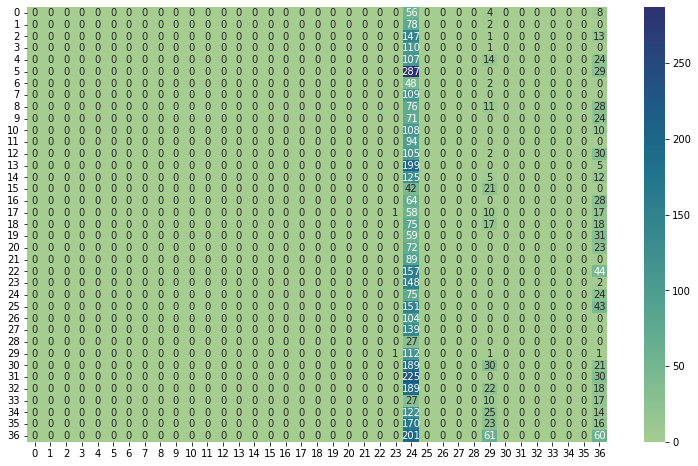

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
amodel = AdaBoostClassifier()
amodel.fit(X, y)
yap = amodel.predict(X)
yap2 = amodel.predict(X2)
yap3 = amodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(y2, yap2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
aa = accuracy_score(y, yap)
a2a = accuracy_score(y2, yap2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(aa, a2a))

training score is: 0.844, validation score is: 0.657.


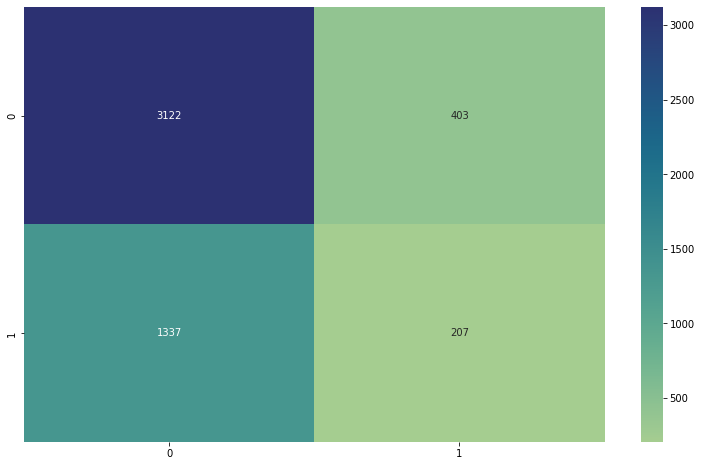

In [ ]:
abmodel = AdaBoostClassifier()
abmodel.fit(X, yb)
yabp = abmodel.predict(X)
yabp2 = abmodel.predict(X2)
yabp3 = abmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(yb2, yabp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
aba = accuracy_score(yb, yabp)
ab2a = accuracy_score(yb2, yabp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(aba, ab2a))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training score is: 0.396, validation score is: 0.141.


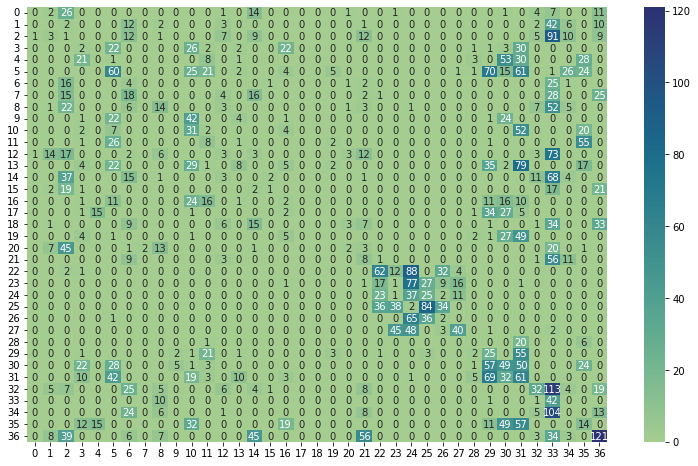

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
lmodel = LogisticRegression(max_iter=20000)
lmodel.fit(X, y)
ylp = lmodel.predict(X)
ylp2 = lmodel.predict(X2)
ylp3 = lmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(y2, ylp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
la = accuracy_score(y, ylp)
l2a = accuracy_score(y2, ylp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(la, l2a))

training score is: 0.787, validation score is: 0.684.


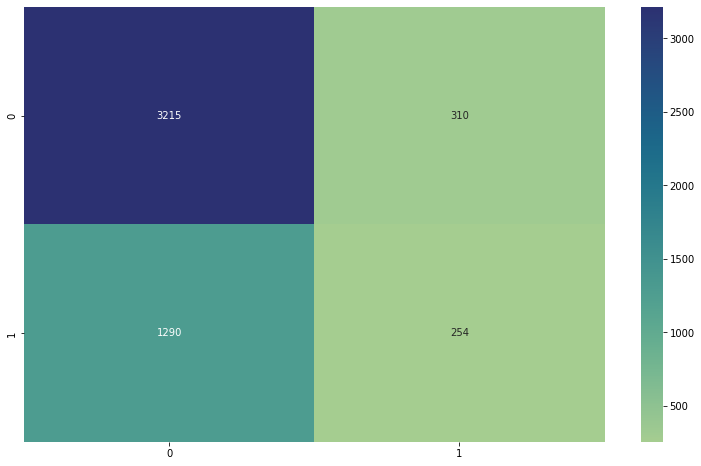

In [ ]:
from sklearn.linear_model import LogisticRegression
lbmodel = LogisticRegression(max_iter=10000)
lbmodel.fit(X, yb)
ylbp = lbmodel.predict(X)
ylbp2 = lbmodel.predict(X2)
ylbp3 = lbmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(yb2, ylbp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
lba = accuracy_score(yb, ylbp)
lb2a = accuracy_score(yb2, ylbp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(lba, lb2a))

As we can see, many of the natural values are mistake by the Logistic regression model as attack.

training score is: 1.000, validation score is: 0.057.


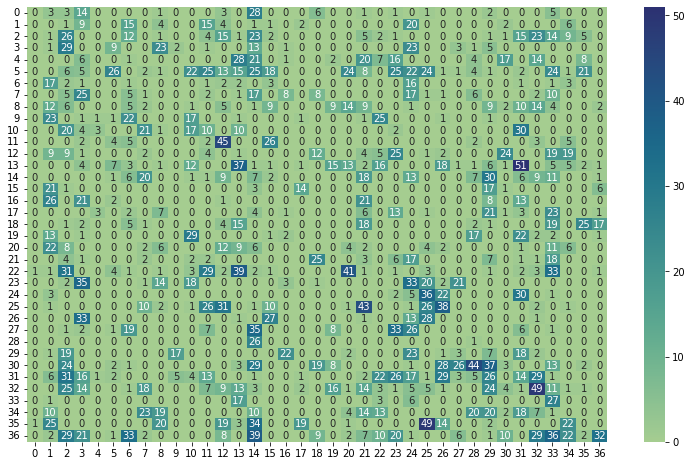

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier(n_estimators=100,random_state=80)
Rmodel.fit(X, y)
yrp = Rmodel.predict(X)
yrp2 = Rmodel.predict(X2)
yrp3 = Rmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(y2, yrp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
ra = accuracy_score(y, yrp)
r2a = accuracy_score(y2, yrp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(ra, r2a))

training score is: 1.000, validation score is: 0.655.


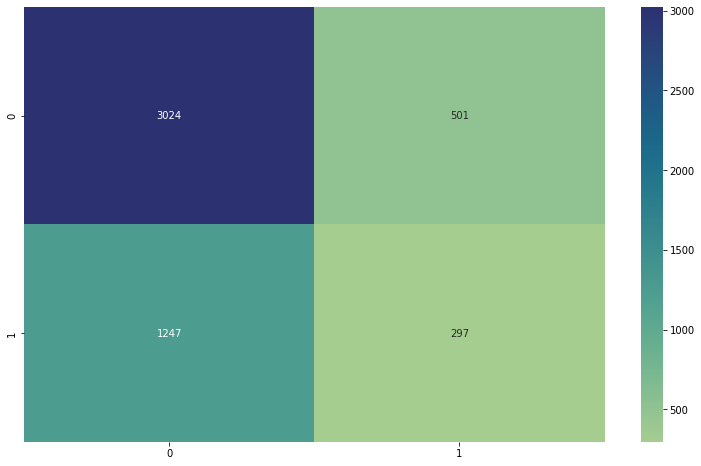

In [ ]:
Rbmodel = RandomForestClassifier(n_estimators=100,random_state=80)
Rbmodel.fit(X, yb)
yrbp = Rbmodel.predict(X)
yrbp2 = Rbmodel.predict(X2)
yrbp3 = Rbmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(yb2, yrbp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
rba = accuracy_score(yb, yrbp)
rb2a = accuracy_score(yb2, yrbp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(rba, rb2a))

training score is: 1.000, validation score is: 0.073.


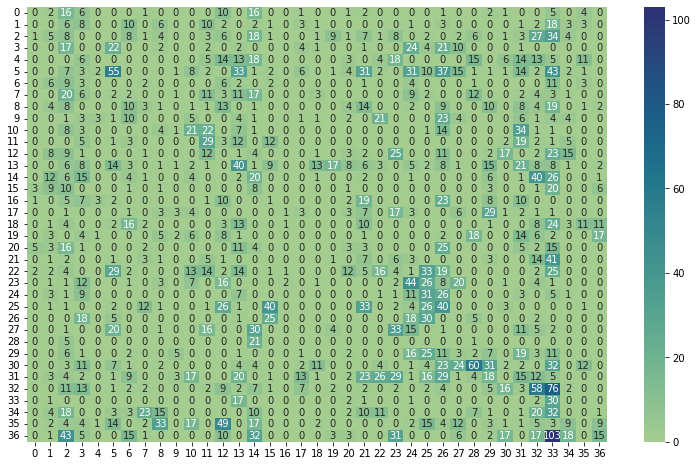

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Gmodel = GradientBoostingClassifier(random_state=80)
Gmodel.fit(X, y)
ygp = Gmodel.predict(X)
ygp2 = Gmodel.predict(X2)
ygp3 = Gmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(y2, ygp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
ga = accuracy_score(y, ygp)
g2a = accuracy_score(y2, ygp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(ga, g2a))

training score is: 0.920, validation score is: 0.696.


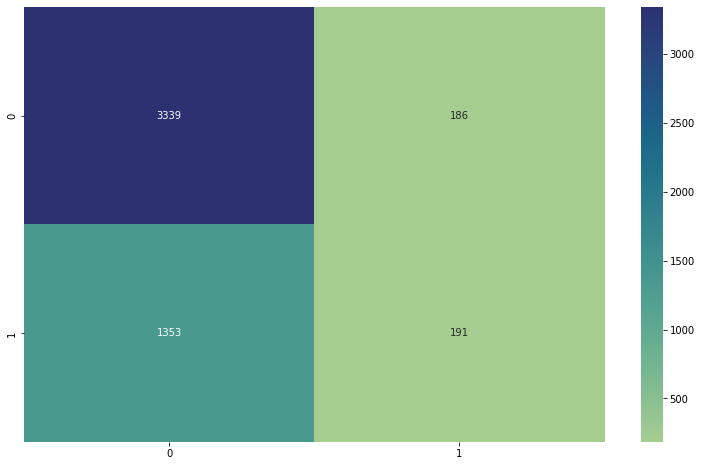

In [ ]:
Gbmodel = GradientBoostingClassifier(random_state=80)
Gbmodel.fit(X, yb)
ygbp = Gbmodel.predict(X)
ygbp2 = Gbmodel.predict(X2)
ygbp3 = Gbmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(yb2, ygbp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
gba = accuracy_score(yb, ygbp)
gb2a = accuracy_score(yb2, ygbp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(gba, gb2a))

training score is: 0.062, validation score is: 0.012.


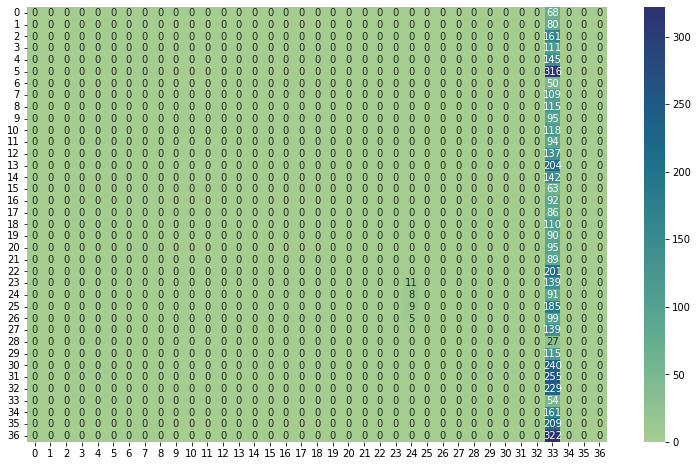

In [ ]:
from sklearn.svm import SVC
Smodel = SVC()
Smodel.fit(X, y)
ysp = Smodel.predict(X)
ysp2 = Smodel.predict(X2)
ysp3 = Smodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(y2, ysp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
sa = accuracy_score(y, ysp)
s2a = accuracy_score(y2, ysp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(sa, s2a))

training score is: 0.778, validation score is: 0.695.


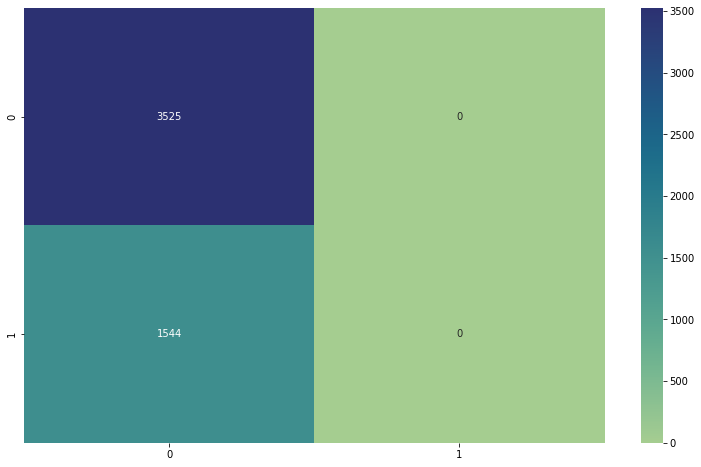

In [ ]:
Sbmodel = SVC()
Sbmodel.fit(X, yb)
ysbp = Sbmodel.predict(X)
ysbp2 = Sbmodel.predict(X2)
ysbp3 = Sbmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(yb2, ysbp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
sba = accuracy_score(yb, ysbp)
sb2a = accuracy_score(yb2, ysbp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(sba, sb2a))

training score is: 0.144, validation score is: 0.093.


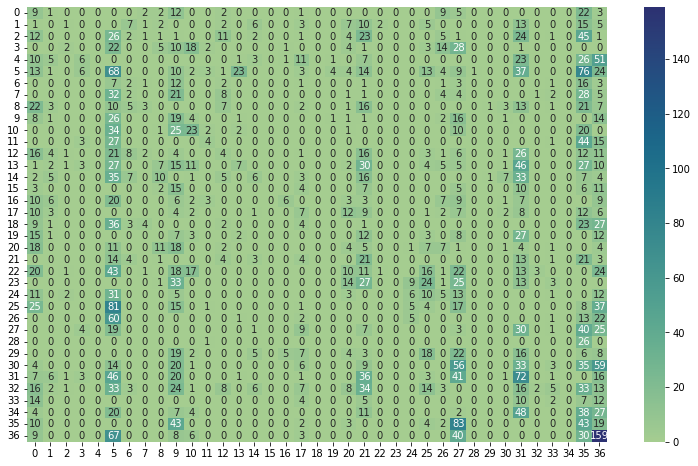

In [ ]:
from sklearn.naive_bayes import BernoulliNB
Bmodel = BernoulliNB()
Bmodel.fit(X, y)
ybp = Bmodel.predict(X)
ybp2 = Bmodel.predict(X2)
ybp3 = Bmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(y2, ybp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
ba = accuracy_score(y, ybp)
b2a = accuracy_score(y2, ybp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(ba, b2a))

training score is: 0.634, validation score is: 0.604.


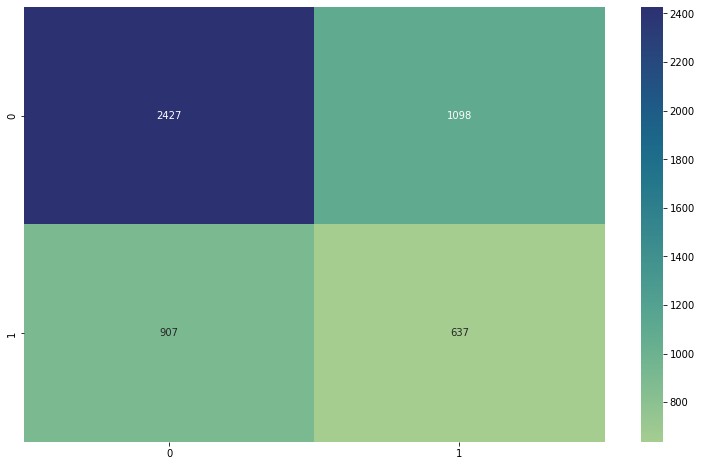

In [ ]:
Bbmodel = BernoulliNB()
Bbmodel.fit(X, yb)
ybbp = Bbmodel.predict(X)
ybbp2 = Bbmodel.predict(X2)
ybbp3 = Bbmodel.predict(X3)
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(yb2, ybbp2)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
bba = accuracy_score(yb, ybbp)
bb2a = accuracy_score(yb2, ybbp2)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(bba, bb2a))

We can see none of this model output a good accuracy when testing with data2 package, some even gave up and output a single answer for any input it take.
##1.1.4 Train a Random Forest Classifier to combine the output of RFC and LR.
In this section, I train a model that take output of many first level models and make a final prediction. I try some different combination of first level models used and see if it makes any difference.

validation score is: 0.608.


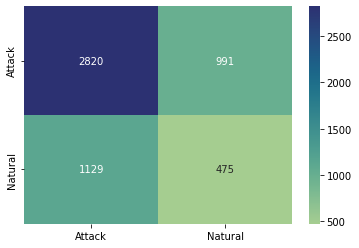

In [ ]:
Xpc = np.stack((ylp, yrp, ygp, ybp), axis=1)
#Xpc[Xpc == 'Natural'] = 0
#Xpc[Xpc == 'Attack'] = 1

Xpc2 = np.stack((ylp2, yrp2, ygp2, ybp2), axis=1)
#Xpc2[Xpc2 == 'Natural'] = 0
#Xpc2[Xpc2 == 'Attack'] = 1

Xpc3 = np.stack((ylp3, yrp3, ygp3, ybp3), axis=1)

RCmodel = RandomForestClassifier(random_state=80)
RCmodel.fit(Xpc2, yb2)
yrpc3 = RCmodel.predict(Xpc3)

yrpc3 = RCmodel.predict(Xpc3)
lva = accuracy_score(yb3, yrpc3)
print('validation score is: {:.3f}.'.format(lva))
cm = confusion_matrix(yb3, yrpc3, labels=["Attack", "Natural"])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=["Attack", "Natural"], yticklabels=["Attack", "Natural"])

validation score is: 0.569.


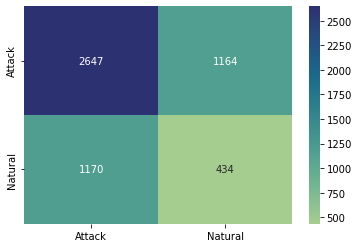

In [ ]:
Xpc = np.stack((yrp, ybp), axis=1)
#Xpc[Xpc == 'Natural'] = 0
#Xpc[Xpc == 'Attack'] = 1

Xpc2 = np.stack((yrp2, ybp2), axis=1)
#Xpc2[Xpc2 == 'Natural'] = 0
#Xpc2[Xpc2 == 'Attack'] = 1

Xpc3 = np.stack((yrp3, ybp3), axis=1)

RCmodel = RandomForestClassifier(random_state=80)
RCmodel.fit(Xpc2, yb2)

yrpc3 = RCmodel.predict(Xpc3)
lva = accuracy_score(yb3, yrpc3)
print('validation score is: {:.3f}.'.format(lva))
cm = confusion_matrix(yb3, yrpc3, labels=["Attack", "Natural"])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=["Attack", "Natural"], yticklabels=["Attack", "Natural"])

validation score is: 0.696.


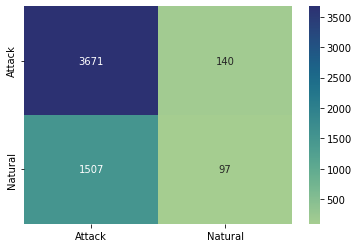

In [ ]:
Xbpc = np.stack((ylbp, yrbp, ygbp, ysbp, ybbp), axis=1)
Xbpc[Xbpc == 'Natural'] = 0
Xbpc[Xbpc == 'Attack'] = 1

Xbpc2 = np.stack((ylbp2, yrbp2, ygbp2, ysbp2, ybbp2), axis=1)
Xbpc2[Xbpc2 == 'Natural'] = 0
Xbpc2[Xbpc2 == 'Attack'] = 1

Xbpc3 = np.stack((ylbp3, yrbp3, ygbp3, ysbp3, ybbp3), axis=1)
Xbpc3[Xbpc3 == 'Natural'] = 0
Xbpc3[Xbpc3 == 'Attack'] = 1

RCmodel = LogisticRegression()
RCmodel.fit(Xbpc2, yb2)
yrbpc3 = RCmodel.predict(Xbpc3)

lva = accuracy_score(yb3, yrbpc3)
print('validation score is: {:.3f}.'.format(lva))
cm = confusion_matrix(yb3, yrbpc3, labels=["Attack", "Natural"])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=["Attack", "Natural"], yticklabels=["Attack", "Natural"])

validation score is: 0.696.


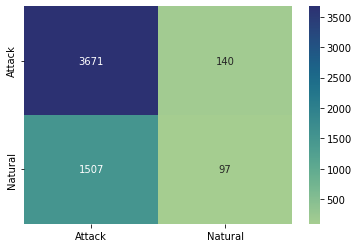

In [ ]:
Xbpc = np.stack((ylbp, yrbp, ygbp, ybbp), axis=1)
Xbpc[Xbpc == 'Natural'] = 0
Xbpc[Xbpc == 'Attack'] = 1

Xbpc2 = np.stack((ylbp2, yrbp2, ygbp2, ybbp2), axis=1)
Xbpc2[Xbpc2 == 'Natural'] = 0
Xbpc2[Xbpc2 == 'Attack'] = 1

Xbpc3 = np.stack((ylbp3, yrbp3, ygbp3, ybbp3), axis=1)
Xbpc3[Xbpc3 == 'Natural'] = 0
Xbpc3[Xbpc3 == 'Attack'] = 1

RCmodel = LogisticRegression()
RCmodel.fit(Xbpc2, yb2)
yrbpc3 = RCmodel.predict(Xbpc3)

lva = accuracy_score(yb3, yrbpc3)
print('validation score is: {:.3f}.'.format(lva))
cm = confusion_matrix(yb3, yrbpc3, labels=["Attack", "Natural"])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=["Attack", "Natural"], yticklabels=["Attack", "Natural"])

validation score is: 0.672.


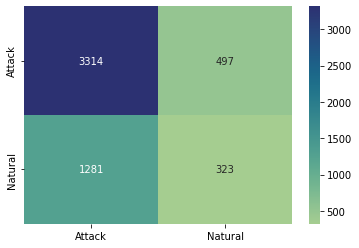

In [ ]:
Xbpc = np.stack((ylbp, yrbp, ybbp), axis=1)
Xbpc[Xbpc == 'Natural'] = 0
Xbpc[Xbpc == 'Attack'] = 1

Xbpc2 = np.stack((ylbp2, yrbp2, ybbp2), axis=1)
Xbpc2[Xbpc2 == 'Natural'] = 0
Xbpc2[Xbpc2 == 'Attack'] = 1

Xbpc3 = np.stack((ylbp3, yrbp3, ybbp3), axis=1)
Xbpc3[Xbpc3 == 'Natural'] = 0
Xbpc3[Xbpc3 == 'Attack'] = 1

RCmodel = LogisticRegression()
RCmodel.fit(Xbpc, yb)
yrbpc3 = RCmodel.predict(Xbpc3)

lva = accuracy_score(yb3, yrbpc3)
print('validation score is: {:.3f}.'.format(lva))
cm = confusion_matrix(yb3, yrbpc3, labels=["Attack", "Natural"])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=["Attack", "Natural"], yticklabels=["Attack", "Natural"])

validation score is: 0.702.


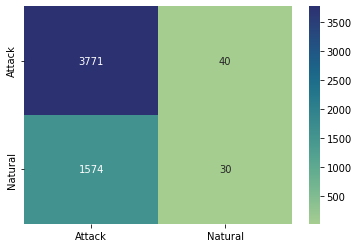

In [ ]:
Xbpc = np.stack((ylbp, yrbp, ybbp), axis=1)
Xbpc[Xbpc == 'Natural'] = 0
Xbpc[Xbpc == 'Attack'] = 1

Xbpc2 = np.stack((ylbp2, yrbp2, ybbp2), axis=1)
Xbpc2[Xbpc2 == 'Natural'] = 0
Xbpc2[Xbpc2 == 'Attack'] = 1

Xbpc3 = np.stack((ylbp3, yrbp3, ybbp3), axis=1)
Xbpc3[Xbpc3 == 'Natural'] = 0
Xbpc3[Xbpc3 == 'Attack'] = 1

RCmodel = LogisticRegression()
RCmodel.fit(Xbpc2, yb2)
yrbpc3 = RCmodel.predict(Xbpc3)

lva = accuracy_score(yb3, yrbpc3)
print('validation score is: {:.3f}.'.format(lva))
cm = confusion_matrix(yb3, yrbpc3, labels=["Attack", "Natural"])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=["Attack", "Natural"], yticklabels=["Attack", "Natural"])

validation score is: 0.704.


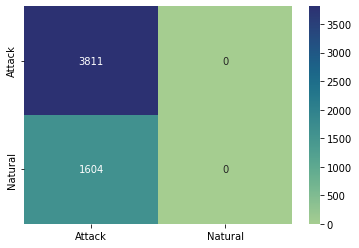

In [ ]:
Xbpc = np.stack((yrbp, ybbp), axis=1)
Xbpc[Xbpc == 'Natural'] = 0
Xbpc[Xbpc == 'Attack'] = 1

Xbpc2 = np.stack((yrbp2, ybbp2), axis=1)
Xbpc2[Xbpc2 == 'Natural'] = 0
Xbpc2[Xbpc2 == 'Attack'] = 1

Xbpc3 = np.stack((yrbp3, ybbp3), axis=1)
Xbpc3[Xbpc3 == 'Natural'] = 0
Xbpc3[Xbpc3 == 'Attack'] = 1

RCmodel = LogisticRegression()
RCmodel.fit(Xbpc2, yb2)
yrbpc3 = RCmodel.predict(Xbpc3)

lva = accuracy_score(yb3, yrbpc3)
print('validation score is: {:.3f}.'.format(lva))
cm = confusion_matrix(yb3, yrbpc3, labels=["Attack", "Natural"])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=["Attack", "Natural"], yticklabels=["Attack", "Natural"])

validation score is: 0.704.


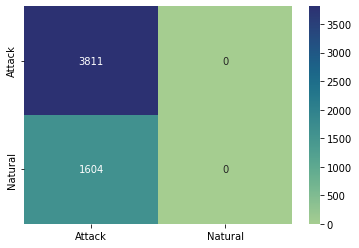

In [ ]:
Xbpc = np.stack((ylbp, yrbp), axis=1)
Xbpc[Xbpc == 'Natural'] = 0
Xbpc[Xbpc == 'Attack'] = 1

Xbpc2 = np.stack((ylbp2, yrbp2), axis=1)
Xbpc2[Xbpc2 == 'Natural'] = 0
Xbpc2[Xbpc2 == 'Attack'] = 1

Xbpc3 = np.stack((ylbp3, yrbp3), axis=1)
Xbpc3[Xbpc3 == 'Natural'] = 0
Xbpc3[Xbpc3 == 'Attack'] = 1

RCmodel = LogisticRegression()
RCmodel.fit(Xbpc2, yb2)
yrbpc3 = RCmodel.predict(Xbpc3)

lva = accuracy_score(yb3, yrbpc3)
print('validation score is: {:.3f}.'.format(lva))
cm = confusion_matrix(yb3, yrbpc3, labels=["Attack", "Natural"])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=["Attack", "Natural"], yticklabels=["Attack", "Natural"])

(10035, 128)
(10035,)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


training score is: 1.000, validation score is: 0.637.


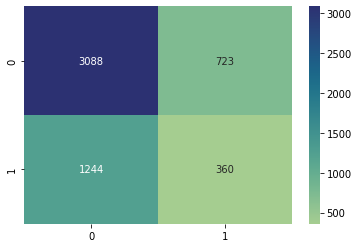

In [ ]:
X12 = np.append(X, X2, axis=0)
print(X12.shape)
yb12 = np.append(yb, yb2, axis=0)
print(yb12.shape)
Rbmodel = RandomForestClassifier(n_estimators=100,random_state=80)
Rbmodel.fit(X12, yb12)
yrbp = Rbmodel.predict(X)
yrbp2 = Rbmodel.predict(X2)
yrbp3 = Rbmodel.predict(X3)
cm = confusion_matrix(yb3, yrbp3)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
rba = accuracy_score(yb, yrbp)
rb2a = accuracy_score(yb3, yrbp3)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(rba, rb2a))

validation score is: 0.637.


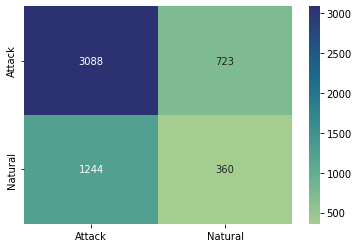

In [ ]:
ybbp12 = Bbmodel.predict(X12)
yrbp12 = Rbmodel.predict(X12)

Xbpc12 = np.stack((yrbp12, ybbp12), axis=1)
Xbpc12[Xbpc12 == 'Natural'] = 0
Xbpc12[Xbpc12 == 'Attack'] = 1

Xbpc2 = np.stack((yrbp2, ybbp2), axis=1)
Xbpc2[Xbpc2 == 'Natural'] = 0
Xbpc2[Xbpc2 == 'Attack'] = 1

Xbpc3 = np.stack((yrbp3, ybbp3), axis=1)
Xbpc3[Xbpc3 == 'Natural'] = 0
Xbpc3[Xbpc3 == 'Attack'] = 1

RCmodel = LogisticRegression()
RCmodel.fit(Xbpc12, yb12)
yrbpc3 = RCmodel.predict(Xbpc3)

lva = accuracy_score(yb3, yrbpc3)
print('validation score is: {:.3f}.'.format(lva))
cm = confusion_matrix(yb3, yrbpc3, labels=["Attack", "Natural"])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", xticklabels=["Attack", "Natural"], yticklabels=["Attack", "Natural"])

We can see none of these models give a good result, some even try to get the highest score by maeking every input as Attack.

#1.2.1 Try CNN with binary output
2 level ML models did not give a good result. Let's see how CNN model will do.
The CNN model is modefied base on Lab 1 architechture.

In [ ]:
from tqdm import tqdm_notebook as tqdm
import tensorflow as tf
import os
import time
import pickle
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Dense,Flatten,Dropout,Input, AveragePooling1D, Activation,Conv1D, MaxPooling1D, BatchNormalization,Concatenate
model = models.Sequential()
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 1)))
model.add(BatchNormalization())
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

# printing the model summary 
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_39 (Conv1D)          (None, 128, 32)           128       
                                                                 
 batch_normalization_48 (Bat  (None, 128, 32)          128       
 chNormalization)                                                
                                                                 
 conv1d_40 (Conv1D)          (None, 128, 32)           3104      
                                                                 
 batch_normalization_49 (Bat  (None, 128, 32)          128       
 chNormalization)                                                
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 127, 32)          0         
 g1D)                                                            
                                                     

In [ ]:
base_learning_rate = 0.001
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=6, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [ ]:
#Split data1+2 package into train and validation data
from sklearn.model_selection import train_test_split
yb12[yb12 == 'Natural'] = 0
yb12[yb12 == 'Attack'] = 1
yb12 = yb12.astype(np.int)
Xt, Xv, yt, yv = train_test_split(X12, yb12, random_state=34)
print(Xt.shape)
print(yt.shape)
print(Xv.shape)
print(yv.shape)

(7526, 128)
(7526,)
(2509, 128)
(2509,)


<ipython-input-162-0af0a576cf89>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  yb12[yb12 == 'Natural'] = 0
<ipython-input-162-0af0a576cf89>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  yb12[yb12 == 'Attack'] = 1
<ipython-input-162-0af0a576cf89>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yb12 = yb12.astype(np.int)


In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(Xt, yt, epochs=30, validation_data=(Xv, yv), callbacks=callback)

Epoch 1/30
236/236 [==============================] - 33s 108ms/step - loss: 0.5827 - accuracy: 0.7358 - val_loss: 0.5655 - val_accuracy: 0.7385
Epoch 2/30
236/236 [==============================] - 26s 111ms/step - loss: 0.5646 - accuracy: 0.7358 - val_loss: 0.6040 - val_accuracy: 0.7385
Epoch 3/30
236/236 [==============================] - 22s 92ms/step - loss: 0.5645 - accuracy: 0.7358 - val_loss: 0.8478 - val_accuracy: 0.7385
Epoch 4/30
236/236 [==============================] - 24s 101ms/step - loss: 0.5596 - accuracy: 0.7358 - val_loss: 0.5502 - val_accuracy: 0.7385
Epoch 5/30
236/236 [==============================] - 23s 99ms/step - loss: 0.5496 - accuracy: 0.7358 - val_loss: 0.5485 - val_accuracy: 0.7385
Epoch 6/30
236/236 [==============================] - 23s 99ms/step - loss: 0.5433 - accuracy: 0.7358 - val_loss: 0.5441 - val_accuracy: 0.7385
Epoch 7/30
236/236 [==============================] - 24s 101ms/step - loss: 0.5347 - accuracy: 0.7358 - val_loss: 0.5386 - val_accur

In [ ]:
ycnnp=model.predict(X)
ycnnp2=model.predict(X2)
ycnnp3=model.predict(X3)

170/170 [==============================] - 5s 28ms/step


validation score is: 0.612.


<ipython-input-165-629ec57d7a57>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yb3 = yb3.astype(np.int)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


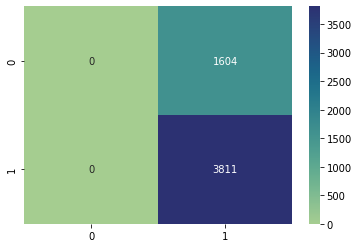

In [ ]:
yb3[yb3 == 'Natural'] = 0
yb3[yb3 == 'Attack'] = 1
yb3 = yb3.astype(np.int)
ycnnp3[ycnnp3 < 0.5] = 0
ycnnp3[ycnnp3 >= 0.5] = 1
cm = confusion_matrix(yb3, ycnnp3)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
bb2a = accuracy_score(yb3, ybbp3)
print('validation score is: {:.3f}.'.format(bba, bb2a))

We see the same thing again, the model trying to get a high score by marking everything as attac when training with data1+data2, and validate with data3.
##1.2.2 Try CNN with muticlass output

In [ ]:
#This function help fixing the skiped number in the output matrix
def ymod2(y):
  y[y == 35] = 31
  y[y == 36] = 32
  y[y == 37] = 33
  y[y == 38] = 34
  y[y == 39] = 35
  y[y == 40] = 36
  y[y == 41] = 0
  y=y.astype('int')
  return y

In [ ]:
ym=ymod2(y)
y2m=ymod2(y2)
y3m=ymod2(y3)
ym

0       0
1       0
2       0
3       0
4       0
       ..
4961    1
4962    1
4963    1
4964    1
4965    1
Name: marker, Length: 4966, dtype: int64

In [ ]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Dense,Flatten,Dropout,Input, AveragePooling1D, Activation,Conv1D, MaxPooling1D, BatchNormalization,Concatenate
model = models.Sequential()
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 1)))
model.add(BatchNormalization())
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(37, activation='softmax'))

# printing the model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 128, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 128, 32)          128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 32)           3104      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 32)          128       
 hNormalization)                                                 
                                                                 
 max_pooling1d (MaxPooling1D  (None, 127, 32)          0         
 )                                                               
                                                        

In [ ]:
base_learning_rate = 0.001
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=6, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [ ]:
#Split data1 package into train and validation data
from sklearn.model_selection import train_test_split
y = y.astype(int)
Xt, Xv, yt, yv = train_test_split(X, ym, random_state=34)
print(Xt.shape)
print(yt.shape)
print(Xv.shape)
print(yv.shape)

(3724, 128)
(3724,)
(1242, 128)
(1242,)


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
history = model.fit(Xt, yt, epochs=30, validation_data=(Xv, yv), callbacks=callback)

Epoch 1/30
117/117 [==============================] - 18s 106ms/step - loss: 4.3215 - accuracy: 0.0502 - val_loss: 3.7271 - val_accuracy: 0.1014
Epoch 2/30
117/117 [==============================] - 18s 157ms/step - loss: 3.7300 - accuracy: 0.0808 - val_loss: 3.4633 - val_accuracy: 0.1159
Epoch 3/30
117/117 [==============================] - 11s 93ms/step - loss: 3.4711 - accuracy: 0.0988 - val_loss: 3.4666 - val_accuracy: 0.1103
Epoch 4/30
117/117 [==============================] - 13s 110ms/step - loss: 3.3654 - accuracy: 0.1066 - val_loss: 3.1039 - val_accuracy: 0.1594
Epoch 5/30
117/117 [==============================] - 13s 109ms/step - loss: 3.2566 - accuracy: 0.1230 - val_loss: 2.9901 - val_accuracy: 0.1739
Epoch 6/30
117/117 [==============================] - 12s 104ms/step - loss: 3.1452 - accuracy: 0.1335 - val_loss: 3.2154 - val_accuracy: 0.1860
Epoch 7/30
117/117 [==============================] - 13s 114ms/step - loss: 3.0805 - accuracy: 0.1369 - val_loss: 2.8520 - val_acc

In [ ]:
train_loss, train_acc = model.evaluate(Xt,  yt, verbose=0)
print('\nModel Train Accuracy:', train_acc*100, '%')
test_loss, test_acc = model.evaluate(Xv,  yv, verbose=0)
print('\nModel Test Accuracy:', test_acc*100, '%')


Model Train Accuracy: 45.75724899768829 %

Model Test Accuracy: 36.795490980148315 %


In [ ]:
ycnnpm=model.predict(X)
ycnnp2m=model.predict(X2)
ycnnp3m=model.predict(X3)

170/170 [==============================] - 3s 18ms/step


In [ ]:
def y2one(y):
  output = []
  for i in y:
    max = 0
    index = 0
    max_index = 0
    for p in i:
      if p > max:
        max = p
        max_index = index
      index = index +1
    output.append(max_index)
  return output

In [ ]:
ycnnpm1 =  np.array(y2one(ycnnpm))
ycnnpm12 =  np.array(y2one(ycnnp2m))
ycnnpm13 =  np.array(y2one(ycnnp3m))
ycnnpm1

array([ 0,  0, 33, ..., 31, 31,  9])

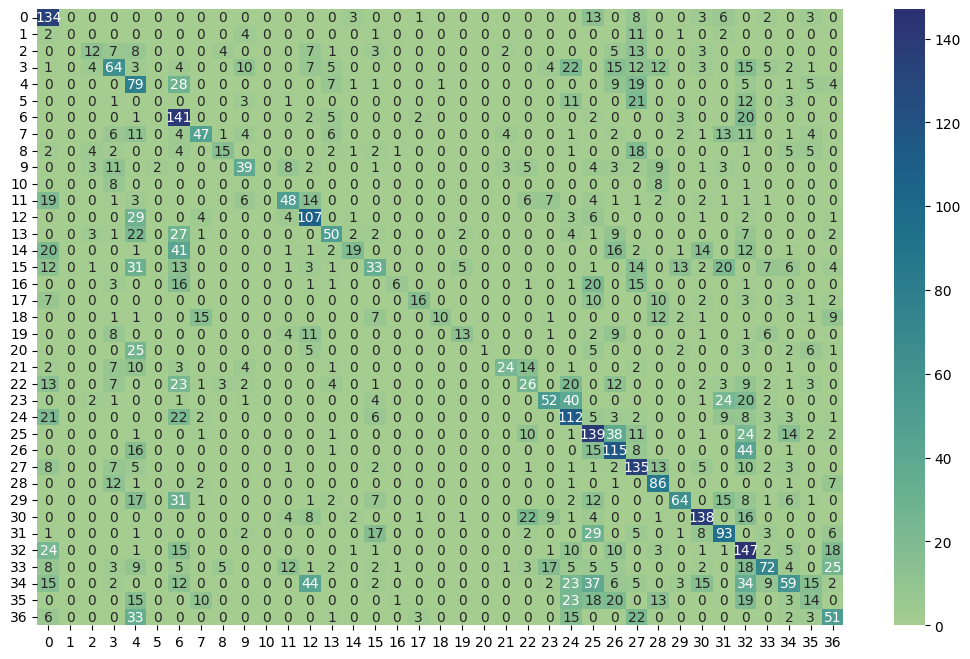

In [ ]:
from sklearn.metrics import confusion_matrix
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(ym, ycnnpm1)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")

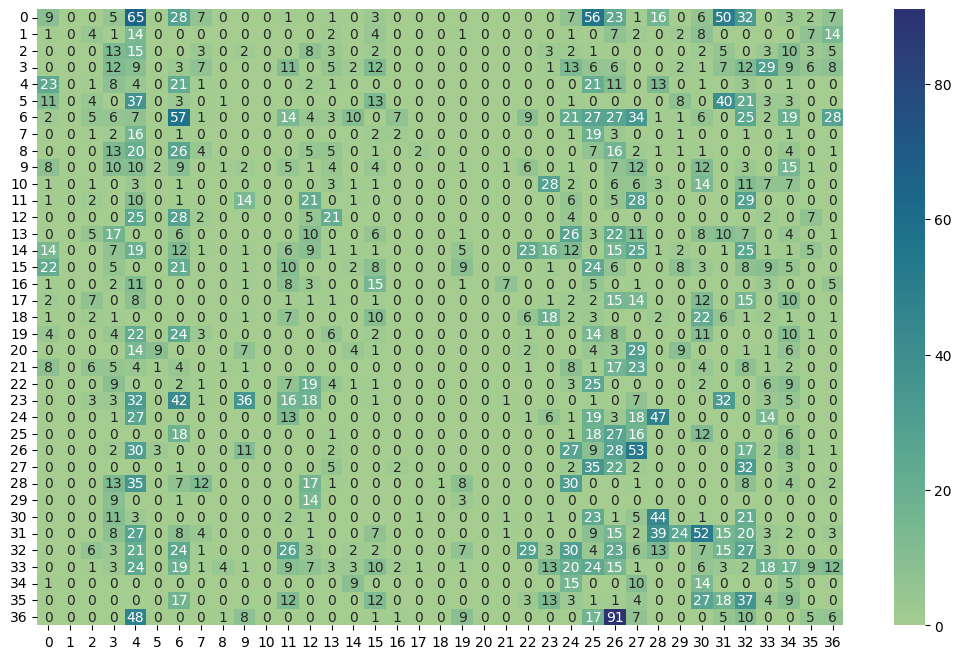

In [ ]:
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(y2m, ycnnpm12)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")

We can see here this model get a reasonable result with a validation data that is split from data1 with the training data, but it got a bad result when testing with data2. Althought the readme file of the dataset said all the difference data package are sample randomly. From this testing it seen like each data package it not general enough for the model to learn and make prediction for other data package. To slove this issue, I try combine mutiple data package into one training dataset.

# 2.0 Combine Input From mutiple data package into one training set
in this part, I try to see how the model will do when it is fitted with data taken from mutiple data package.
##2.1 Load more data
I loaded 6 difference data package. data1 is keep for testing, data2-data6 are combined and sampled to train a model.

In [ ]:
raw_data = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data1 Sampled Scenarios.csv.arff')
data = pd.DataFrame(raw_data[0])
data.fillna(0).describe()
data.replace([np.inf, -np.inf], 0, inplace=True)
print(data.shape)
raw_data2 = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data2 Sampled Scenarios.csv.arff')
data2 = pd.DataFrame(raw_data2[0])
data2.fillna(0).describe()
data2.replace([np.inf, -np.inf], 0, inplace=True)
print(data2.shape)
raw_data3 = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data3 Sampled Scenarios.csv.arff')
data3 = pd.DataFrame(raw_data3[0])
data3.fillna(0).describe()
data3.replace([np.inf, -np.inf], 0, inplace=True)
print(data3.shape)
raw_data4 = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data4 Sampled Scenarios.csv.arff')
data4 = pd.DataFrame(raw_data4[0])
data4.fillna(0).describe()
data4.replace([np.inf, -np.inf], 0, inplace=True)
print(data4.shape)
raw_data5 = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data5 Sampled Scenarios.csv.arff')
data5 = pd.DataFrame(raw_data5[0])
data5.fillna(0).describe()
data5.replace([np.inf, -np.inf], 0, inplace=True)
print(data5.shape)
raw_data6 = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data6 Sampled Scenarios.csv.arff')
data6 = pd.DataFrame(raw_data6[0])
data6.fillna(0).describe()
data6.replace([np.inf, -np.inf], 0, inplace=True)
print(data6.shape)
datab = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data1.csv', na_values='?')
datab.fillna(0).describe()
datab.replace([np.inf, -np.inf], 0, inplace=True)
print(datab.shape)
datab2 = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data2.csv', na_values='?')
datab2.fillna(0).describe()
datab2.replace([np.inf, -np.inf], 0, inplace=True)
print(datab2.shape)
datab3 = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data3.csv', na_values='?')
datab3.fillna(0).describe()
datab3.replace([np.inf, -np.inf], 0, inplace=True)
print(datab3.shape)
datab4 = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data4.csv', na_values='?')
datab4.fillna(0).describe()
datab4.replace([np.inf, -np.inf], 0, inplace=True)
print(datab4.shape)
datab5 = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data5.csv', na_values='?')
datab5.fillna(0).describe()
datab5.replace([np.inf, -np.inf], 0, inplace=True)
print(datab5.shape)
datab6 = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data6.csv', na_values='?')
datab6.fillna(0).describe()
datab6.replace([np.inf, -np.inf], 0, inplace=True)
print(datab6.shape)

(4966, 129)
(5069, 129)
(5415, 129)
(5202, 129)
(5161, 129)
(4967, 129)
(4966, 129)
(5069, 129)
(5415, 129)
(5202, 129)
(5161, 129)
(4967, 129)


In [ ]:
#Combine data2 - data6 into one file.
frames = [data2,data3,data4,data5,data6]
datac = pd.concat(frames,ignore_index=True)
frames = [datab2,datab3,datab4,datab5,datab6]
databc = pd.concat(frames,ignore_index=True)
print(datac.shape)
databc

(25814, 129)


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-26.247197,130681.8832,-146.224559,130656.8100,93.781732,130757.1031,-24.287681,390.75674,-148.688277,414.92726,...,0,0,0,0,0,0,0,0,0,Natural
1,-28.441625,130255.6377,-148.413258,130230.5644,91.581574,130330.8575,-29.375546,458.69055,-152.498447,477.73399,...,0,0,0,0,0,0,0,0,0,Natural
2,-28.968746,130431.1505,-148.951838,130431.1505,91.054453,130506.3704,-29.971422,458.87366,-153.048486,477.36777,...,0,0,0,0,0,0,0,0,0,Natural
3,-29.163552,130456.2238,-149.146644,130406.0773,90.848188,130506.3704,-30.263631,459.42299,-153.214644,477.18466,...,0,0,0,0,0,0,0,0,0,Natural
4,-29.461490,130406.0773,-149.438852,130381.0040,90.561709,130456.2238,-30.825129,461.07098,-153.638633,478.28332,...,0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25809,173.864043,131233.4952,53.869492,131183.3486,-66.136518,131283.6417,179.948855,325.93580,57.398912,334.72508,...,0,0,0,0,0,0,0,0,0,Natural
25810,173.852584,131233.4952,53.863762,131183.3486,-66.147977,131283.6417,179.903018,326.11891,57.358805,334.72508,...,0,0,0,0,0,0,0,0,0,Natural
25811,173.382758,131283.6417,53.405396,131233.4952,-66.606344,131333.7883,177.359085,333.62642,55.147188,341.31704,...,0,0,0,0,0,0,0,0,0,Natural
25812,173.348381,131308.7150,53.376748,131258.5685,-66.634992,131358.8615,177.026770,334.72508,54.975300,341.50015,...,0,0,0,0,0,0,0,0,0,Natural


In [ ]:
#Sample 1 out of every 5 rows to get a combined file with about the same size as individual data package.
def sampledata (data):
  output = data.loc[[0]]
  print(len(data.index))
  for i in range(1, len(data.index)):
    if i%5 == 0:
      output = pd.concat([output, data.loc[[i]]])
  return output


In [ ]:
datasmall = sampledata(datac)
datasmallb = sampledata(databc)
datasmall

25814
25814


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-26.247197,130681.8832,-146.224559,130656.8100,93.781732,130757.1031,-24.287681,390.75674,-148.688277,414.92726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
5,-30.068825,130706.9565,-150.057647,130681.8832,89.948644,130757.1031,-32.435141,466.19806,-154.217320,476.81844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
10,-24.230385,132437.0121,-144.219207,132411.9389,95.775625,132512.2320,-24.757506,335.09130,-145.393770,339.30283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
15,-18.976362,132587.4518,-138.947995,132587.4518,101.046837,132662.6716,-18.254435,263.67840,-137.933860,265.14328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
20,-23.943906,132010.7666,-143.909809,131985.6933,96.085022,132060.9131,-25.691428,355.41651,-145.548469,356.88139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25790,-9.069922,130631.7367,-129.053014,130631.7367,110.947547,130732.0298,-9.184513,425.91386,-130.663025,434.52003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
25795,174.362516,131634.6675,54.390883,131584.5210,-65.626586,131684.8140,177.536702,336.00685,53.491340,351.02187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
25800,173.944257,131860.3269,53.966895,131810.1804,-66.033386,131910.4735,174.373975,347.35967,52.460016,352.66986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
25805,-175.307897,129077.1940,64.704124,129001.9742,-55.301886,129127.3405,-146.608441,303.96260,75.687725,534.86431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'


In [ ]:
print(datasmall.shape)
print(datasmallb.shape)

(5163, 129)
(5163, 129)


In [ ]:
X = datab[['R1-PA1:VH','R1-PM1:V','R1-PA2:VH','R1-PM2:V','R1-PA3:VH','R1-PM3:V','R1-PA4:IH','R1-PM4:I','R1-PA5:IH','R1-PM5:I','R1-PA6:IH','R1-PM6:I','R1-PA7:VH','R1-PM7:V','R1-PA8:VH','R1-PM8:V','R1-PA9:VH','R1-PM9:V','R1-PA10:IH','R1-PM10:I','R1-PA11:IH','R1-PM11:I','R1-PA12:IH','R1-PM12:I','R1:F','R1:DF','R1-PA:Z','R1-PA:ZH','R1:S','R2-PA1:VH','R2-PM1:V','R2-PA2:VH','R2-PM2:V','R2-PA3:VH','R2-PM3:V','R2-PA4:IH','R2-PM4:I','R2-PA5:IH','R2-PM5:I','R2-PA6:IH','R2-PM6:I','R2-PA7:VH','R2-PM7:V','R2-PA8:VH','R2-PM8:V','R2-PA9:VH','R2-PM9:V','R2-PA10:IH','R2-PM10:I','R2-PA11:IH','R2-PM11:I','R2-PA12:IH','R2-PM12:I','R2:F','R2:DF','R2-PA:Z','R2-PA:ZH','R2:S','R3-PA1:VH','R3-PM1:V','R3-PA2:VH','R3-PM2:V','R3-PA3:VH','R3-PM3:V','R3-PA4:IH','R3-PM4:I','R3-PA5:IH','R3-PM5:I','R3-PA6:IH','R3-PM6:I','R3-PA7:VH','R3-PM7:V','R3-PA8:VH','R3-PM8:V','R3-PA9:VH','R3-PM9:V','R3-PA10:IH','R3-PM10:I','R3-PA11:IH','R3-PM11:I','R3-PA12:IH','R3-PM12:I','R3:F','R3:DF','R3-PA:Z','R3-PA:ZH','R3:S','R4-PA1:VH','R4-PM1:V','R4-PA2:VH','R4-PM2:V','R4-PA3:VH','R4-PM3:V','R4-PA4:IH','R4-PM4:I','R4-PA5:IH','R4-PM5:I','R4-PA6:IH','R4-PM6:I','R4-PA7:VH','R4-PM7:V','R4-PA8:VH','R4-PM8:V','R4-PA9:VH','R4-PM9:V','R4-PA10:IH','R4-PM10:I','R4-PA11:IH','R4-PM11:I','R4-PA12:IH','R4-PM12:I','R4:F','R4:DF','R4-PA:Z','R4-PA:ZH','R4:S','control_panel_log1','control_panel_log2','control_panel_log3','control_panel_log4','relay1_log','relay2_log','relay3_log','relay4_log','snort_log1','snort_log2','snort_log3','snort_log4']]
y = data['marker']
Xc = datasmallb[['R1-PA1:VH','R1-PM1:V','R1-PA2:VH','R1-PM2:V','R1-PA3:VH','R1-PM3:V','R1-PA4:IH','R1-PM4:I','R1-PA5:IH','R1-PM5:I','R1-PA6:IH','R1-PM6:I','R1-PA7:VH','R1-PM7:V','R1-PA8:VH','R1-PM8:V','R1-PA9:VH','R1-PM9:V','R1-PA10:IH','R1-PM10:I','R1-PA11:IH','R1-PM11:I','R1-PA12:IH','R1-PM12:I','R1:F','R1:DF','R1-PA:Z','R1-PA:ZH','R1:S','R2-PA1:VH','R2-PM1:V','R2-PA2:VH','R2-PM2:V','R2-PA3:VH','R2-PM3:V','R2-PA4:IH','R2-PM4:I','R2-PA5:IH','R2-PM5:I','R2-PA6:IH','R2-PM6:I','R2-PA7:VH','R2-PM7:V','R2-PA8:VH','R2-PM8:V','R2-PA9:VH','R2-PM9:V','R2-PA10:IH','R2-PM10:I','R2-PA11:IH','R2-PM11:I','R2-PA12:IH','R2-PM12:I','R2:F','R2:DF','R2-PA:Z','R2-PA:ZH','R2:S','R3-PA1:VH','R3-PM1:V','R3-PA2:VH','R3-PM2:V','R3-PA3:VH','R3-PM3:V','R3-PA4:IH','R3-PM4:I','R3-PA5:IH','R3-PM5:I','R3-PA6:IH','R3-PM6:I','R3-PA7:VH','R3-PM7:V','R3-PA8:VH','R3-PM8:V','R3-PA9:VH','R3-PM9:V','R3-PA10:IH','R3-PM10:I','R3-PA11:IH','R3-PM11:I','R3-PA12:IH','R3-PM12:I','R3:F','R3:DF','R3-PA:Z','R3-PA:ZH','R3:S','R4-PA1:VH','R4-PM1:V','R4-PA2:VH','R4-PM2:V','R4-PA3:VH','R4-PM3:V','R4-PA4:IH','R4-PM4:I','R4-PA5:IH','R4-PM5:I','R4-PA6:IH','R4-PM6:I','R4-PA7:VH','R4-PM7:V','R4-PA8:VH','R4-PM8:V','R4-PA9:VH','R4-PM9:V','R4-PA10:IH','R4-PM10:I','R4-PA11:IH','R4-PM11:I','R4-PA12:IH','R4-PM12:I','R4:F','R4:DF','R4-PA:Z','R4-PA:ZH','R4:S','control_panel_log1','control_panel_log2','control_panel_log3','control_panel_log4','relay1_log','relay2_log','relay3_log','relay4_log','snort_log1','snort_log2','snort_log3','snort_log4']]
yc = datasmall['marker']

In [ ]:
#Modified lables as before
y=ymod(y)
yc=ymod(yc)
ym=ymod2(y)
ycm=ymod2(yc)
ycm

##2.2.1 Train the CNN model with combined data package

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Dense,Flatten,Dropout,Input, AveragePooling1D, Activation,Conv1D, MaxPooling1D, BatchNormalization,Concatenate
model = models.Sequential()
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 1)))
model.add(BatchNormalization())
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(37, activation='softmax'))

# printing the model summary 
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_66 (Conv1D)          (None, 128, 32)           128       
                                                                 
 batch_normalization_77 (Bat  (None, 128, 32)          128       
 chNormalization)                                                
                                                                 
 conv1d_67 (Conv1D)          (None, 128, 32)           3104      
                                                                 
 batch_normalization_78 (Bat  (None, 128, 32)          128       
 chNormalization)                                                
                                                                 
 max_pooling1d_33 (MaxPoolin  (None, 127, 32)          0         
 g1D)                                                            
                                                     

In [ ]:
base_learning_rate = 0.001
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=6, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [ ]:
#Split combined data package into train and validation data
from sklearn.model_selection import train_test_split
ycm = ycm.astype(int)
Xt, Xv, yt, yv = train_test_split(Xc, ycm, random_state=34)
print(Xt.shape)
print(yt.shape)
print(Xv.shape)
print(yv.shape)

(3872, 128)
(3872,)
(1291, 128)
(1291,)


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
history = model.fit(Xt, yt, epochs=45, validation_data=(Xv, yv), callbacks=callback)

Epoch 1/45
121/121 [==============================] - 19s 105ms/step - loss: 4.4074 - accuracy: 0.0354 - val_loss: 4.1993 - val_accuracy: 0.0527
Epoch 2/45
121/121 [==============================] - 12s 101ms/step - loss: 3.9130 - accuracy: 0.0553 - val_loss: 3.5762 - val_accuracy: 0.0775
Epoch 3/45
121/121 [==============================] - 13s 106ms/step - loss: 3.7559 - accuracy: 0.0589 - val_loss: 3.5629 - val_accuracy: 0.0573
Epoch 4/45
121/121 [==============================] - 13s 107ms/step - loss: 3.6622 - accuracy: 0.0713 - val_loss: 3.5810 - val_accuracy: 0.0798
Epoch 5/45
121/121 [==============================] - 13s 106ms/step - loss: 3.5948 - accuracy: 0.0721 - val_loss: 3.4420 - val_accuracy: 0.0813
Epoch 6/45
121/121 [==============================] - 12s 102ms/step - loss: 3.5602 - accuracy: 0.0739 - val_loss: 3.4756 - val_accuracy: 0.0837
Epoch 7/45
121/121 [==============================] - 10s 85ms/step - loss: 3.4999 - accuracy: 0.0814 - val_loss: 3.4232 - val_acc

##2.2.2 Evaluate the CNN model

In [ ]:
train_loss, train_acc = model.evaluate(Xt,  yt, verbose=0)
print('\nModel Train Accuracy:', train_acc*100, '%')
test_loss, test_acc = model.evaluate(Xv,  yv, verbose=0)
print('\nModel Test Accuracy:', test_acc*100, '%')


Model Train Accuracy: 13.533057272434235 %

Model Test Accuracy: 10.999225080013275 %


162/162 [==============================] - 3s 19ms/step


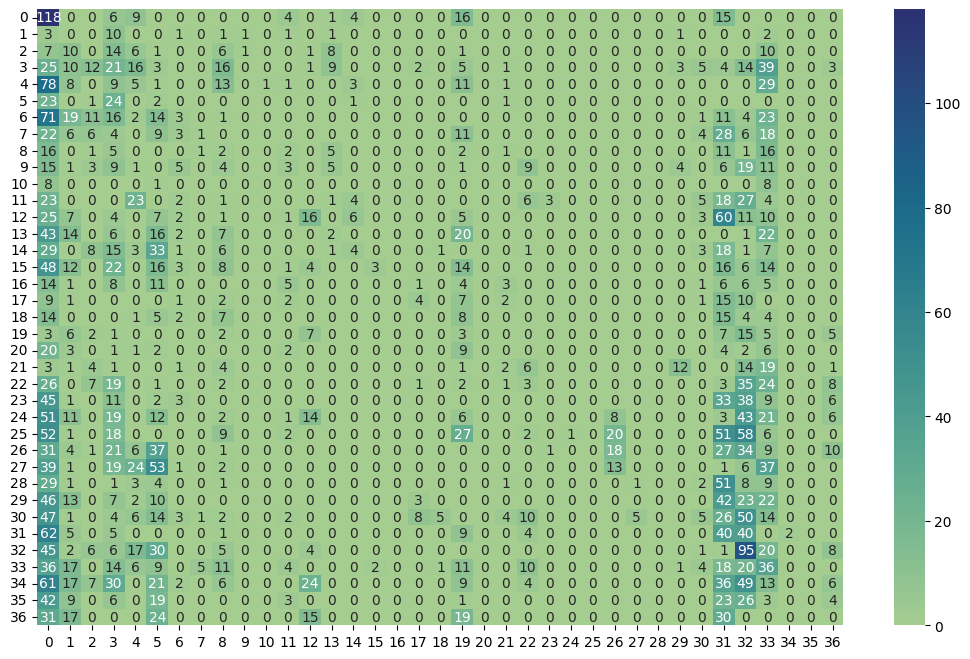

In [ ]:
#Testing with unseen data1 package
from matplotlib.colors import XKCD_COLORS
ycnnpm=model.predict(X)
ycnnpcm=model.predict(Xc)
ycnnpm1 =  np.array(y2one(ycnnpm))
ycnnpmc =  np.array(y2one(ycnnpcm))
from sklearn.metrics import confusion_matrix
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(ym, ycnnpm1)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")

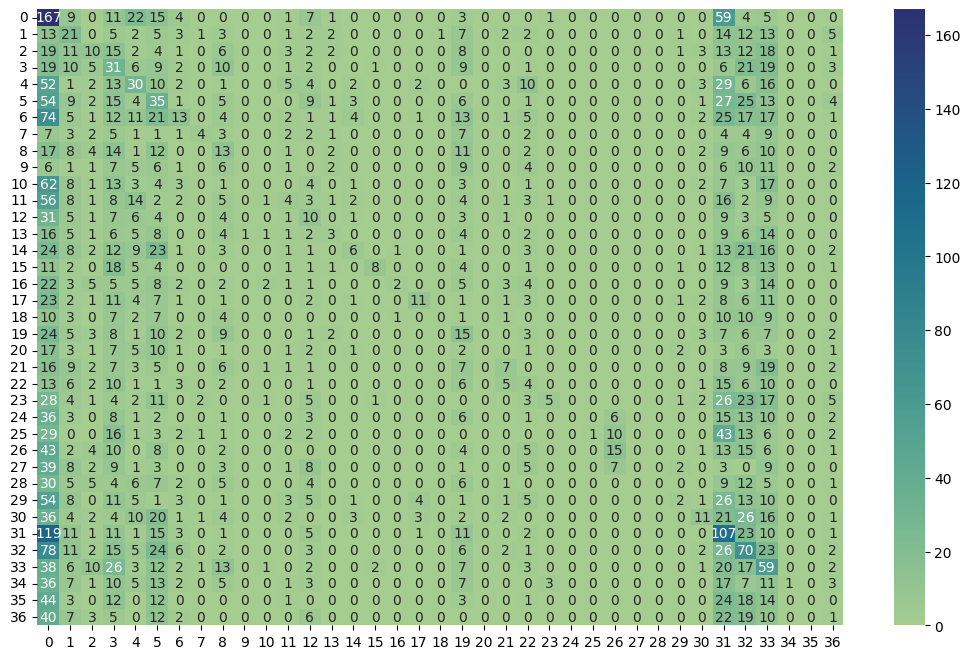

In [ ]:
#Testing with the combined data package
fig = plt.subplots(figsize =(13, 8))
cm = confusion_matrix(ycm, ycnnpmc)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")

The result is not good. There may not be good enough connection between difference data packages.
##2.3 Train and evaluate a Random Forest Classifier with the combined data package

In [ ]:
ycb = datasmallb['marker']
Xt, Xv, yt, yv = train_test_split(Xc, ycb, random_state=34)
print(Xt.shape)
print(yt.shape)
print(Xv.shape)
print(yv.shape)

(3872, 128)
(3872,)
(1291, 128)
(1291,)


training score is: 1.000, validation score is: 0.782.


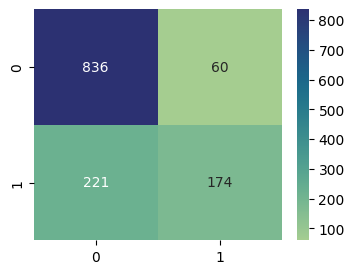

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rbmodel = RandomForestClassifier(n_estimators=100,random_state=80)
Rbmodel.fit(Xt, yt)
yrt = Rbmodel.predict(Xt)
yrv = Rbmodel.predict(Xv)
fig = plt.subplots(figsize =(4, 3))
cm = confusion_matrix(yv, yrv)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
from sklearn.metrics import accuracy_score
rba = accuracy_score(yt, yrt)
rb2a = accuracy_score(yv, yrv)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(rba, rb2a))

The rusult From section 2 is not great, this mean there may not be a strong connection between eavh difference data package. We can also see a hint of this when we check X, X2, and X3 when we load them. For those rows showed, rows from same event within one data package are close to each other, but very difference from those in other data package.
# 3.0 Difference optimization methods apply to CNN affect the model
With the combining method does not work, I am going to stay with data1 only and change the target to study how difference optimization methods apply to CNN affect the model.
## 3.1 Reload data

In [ ]:
from scipy.io.arff import loadarff 
raw_data = loadarff('/content/drive/MyDrive/ENDG511/muticlass/data1 Sampled Scenarios.csv.arff')
data = pd.DataFrame(raw_data[0])
data.fillna(0).describe()
data.replace([np.inf, -np.inf], 0, inplace=True)
print(data.shape)
datab = pd.read_csv('/content/drive/MyDrive/ENDG510/binaryAllNaturalPlusNormalVsAttacks/data1.csv', na_values='?')
datab.fillna(0).describe()
datab.replace([np.inf, -np.inf], 0, inplace=True)
print(datab.shape)

(4966, 129)
(4966, 129)


In [ ]:
X = datab[['R1-PA1:VH','R1-PM1:V','R1-PA2:VH','R1-PM2:V','R1-PA3:VH','R1-PM3:V','R1-PA4:IH','R1-PM4:I','R1-PA5:IH','R1-PM5:I','R1-PA6:IH','R1-PM6:I','R1-PA7:VH','R1-PM7:V','R1-PA8:VH','R1-PM8:V','R1-PA9:VH','R1-PM9:V','R1-PA10:IH','R1-PM10:I','R1-PA11:IH','R1-PM11:I','R1-PA12:IH','R1-PM12:I','R1:F','R1:DF','R1-PA:Z','R1-PA:ZH','R1:S','R2-PA1:VH','R2-PM1:V','R2-PA2:VH','R2-PM2:V','R2-PA3:VH','R2-PM3:V','R2-PA4:IH','R2-PM4:I','R2-PA5:IH','R2-PM5:I','R2-PA6:IH','R2-PM6:I','R2-PA7:VH','R2-PM7:V','R2-PA8:VH','R2-PM8:V','R2-PA9:VH','R2-PM9:V','R2-PA10:IH','R2-PM10:I','R2-PA11:IH','R2-PM11:I','R2-PA12:IH','R2-PM12:I','R2:F','R2:DF','R2-PA:Z','R2-PA:ZH','R2:S','R3-PA1:VH','R3-PM1:V','R3-PA2:VH','R3-PM2:V','R3-PA3:VH','R3-PM3:V','R3-PA4:IH','R3-PM4:I','R3-PA5:IH','R3-PM5:I','R3-PA6:IH','R3-PM6:I','R3-PA7:VH','R3-PM7:V','R3-PA8:VH','R3-PM8:V','R3-PA9:VH','R3-PM9:V','R3-PA10:IH','R3-PM10:I','R3-PA11:IH','R3-PM11:I','R3-PA12:IH','R3-PM12:I','R3:F','R3:DF','R3-PA:Z','R3-PA:ZH','R3:S','R4-PA1:VH','R4-PM1:V','R4-PA2:VH','R4-PM2:V','R4-PA3:VH','R4-PM3:V','R4-PA4:IH','R4-PM4:I','R4-PA5:IH','R4-PM5:I','R4-PA6:IH','R4-PM6:I','R4-PA7:VH','R4-PM7:V','R4-PA8:VH','R4-PM8:V','R4-PA9:VH','R4-PM9:V','R4-PA10:IH','R4-PM10:I','R4-PA11:IH','R4-PM11:I','R4-PA12:IH','R4-PM12:I','R4:F','R4:DF','R4-PA:Z','R4-PA:ZH','R4:S','control_panel_log1','control_panel_log2','control_panel_log3','control_panel_log4','relay1_log','relay2_log','relay3_log','relay4_log','snort_log1','snort_log2','snort_log3','snort_log4']]
y = data['marker']

In [ ]:
#Lable mod function as in section 1 and 2.
def ymod(yi):
  y = yi.copy()
  y[y == 'b\'1\''] = 1
  y[y == 'b\'2\''] = 2
  y[y == 'b\'3\''] = 3
  y[y == 'b\'4\''] = 4
  y[y == 'b\'5\''] = 5
  y[y == 'b\'6\''] = 6
  y[y == 'b\'7\''] = 7
  y[y == 'b\'8\''] = 8
  y[y == 'b\'9\''] = 9
  y[y == 'b\'10\''] = 10
  y[y == 'b\'11\''] = 11
  y[y == 'b\'12\''] = 12
  y[y == 'b\'13\''] = 13
  y[y == 'b\'14\''] = 14
  y[y == 'b\'15\''] = 15
  y[y == 'b\'16\''] = 16
  y[y == 'b\'17\''] = 17
  y[y == 'b\'18\''] = 18
  y[y == 'b\'19\''] = 19
  y[y == 'b\'20\''] = 20
  y[y == 'b\'21\''] = 21
  y[y == 'b\'22\''] = 22
  y[y == 'b\'23\''] = 23
  y[y == 'b\'24\''] = 24
  y[y == 'b\'25\''] = 25
  y[y == 'b\'26\''] = 26
  y[y == 'b\'27\''] = 27
  y[y == 'b\'28\''] = 28
  y[y == 'b\'29\''] = 29
  y[y == 'b\'30\''] = 30
  y[y == 'b\'31\''] = 31
  y[y == 'b\'32\''] = 32
  y[y == 'b\'33\''] = 33
  y[y == 'b\'34\''] = 34
  y[y == 'b\'35\''] = 35
  y[y == 'b\'36\''] = 36
  y[y == 'b\'37\''] = 37
  y[y == 'b\'38\''] = 38
  y[y == 'b\'39\''] = 39
  y[y == 'b\'40\''] = 40
  y[y == 'b\'41\''] = 41
  y=y.astype('int')
  return y

def ymod2(y):
  y[y == 35] = 31
  y[y == 36] = 32
  y[y == 37] = 33
  y[y == 38] = 34
  y[y == 39] = 35
  y[y == 40] = 36
  y[y == 41] = 0
  y=y.astype('int')
  return y

In [ ]:
y=ymod(y)
ym=ymod2(y)

## 3.2 Train the base model
This model is an over kill model for this kind of application, I only choose this setup as the results from section 1 and 2 are so bad. This complex model should give a more reliable outcome, and it also creates a model with larger size. This will make the decrease in size more visible after pruning and clustering is been used.

In [ ]:
from tqdm import tqdm_notebook as tqdm
import tensorflow as tf
import os
import time
import pickle
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Dense,Flatten,Dropout,Input, AveragePooling1D, Activation,Conv1D, MaxPooling1D, BatchNormalization,Concatenate

In [ ]:
#Used the same modified CNN architecture used in section 1.2.2
model = models.Sequential()
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 1)))
model.add(BatchNormalization())
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(37, activation='softmax'))

base_learning_rate = 0.001
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=6, verbose=0, mode='auto', baseline=None, restore_best_weights=True)


In [ ]:
from sklearn.model_selection import train_test_split
ym = ym.astype(int)
Xt, Xv, yt, yv = train_test_split(X, ym, random_state=34)
print(Xt.shape)
print(yt.shape)
print(Xv.shape)
print(yv.shape)

(3724, 128)
(3724,)
(1242, 128)
(1242,)


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
history = model.fit(Xt, yt, epochs=60, validation_data=(Xv, yv), callbacks=callback)

Epoch 1/60
117/117 [==============================] - 24s 120ms/step - loss: 4.1605 - accuracy: 0.0572 - val_loss: 4.2342 - val_accuracy: 0.0862
Epoch 2/60
117/117 [==============================] - 12s 103ms/step - loss: 3.5270 - accuracy: 0.0985 - val_loss: 3.1002 - val_accuracy: 0.1465
Epoch 3/60
117/117 [==============================] - 11s 96ms/step - loss: 3.3253 - accuracy: 0.1200 - val_loss: 3.0332 - val_accuracy: 0.1514
Epoch 4/60
117/117 [==============================] - 11s 97ms/step - loss: 3.2024 - accuracy: 0.1321 - val_loss: 3.0534 - val_accuracy: 0.1594
Epoch 5/60
117/117 [==============================] - 11s 93ms/step - loss: 3.0912 - accuracy: 0.1517 - val_loss: 2.8303 - val_accuracy: 0.1787
Epoch 6/60
117/117 [==============================] - 12s 101ms/step - loss: 2.9975 - accuracy: 0.1536 - val_loss: 2.8034 - val_accuracy: 0.1659
Epoch 7/60
117/117 [==============================] - 20s 170ms/step - loss: 2.9119 - accuracy: 0.1670 - val_loss: 2.7309 - val_accur

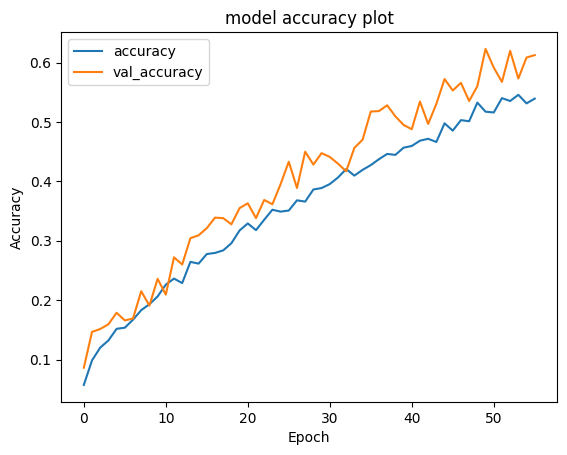

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
#Save base model to be optimized
model.save('trained_base_model.h5')

For some unknow reason the training process keep stopping at about 56 epochs after I run it mutiple times, this may cause by limited usage as a free user of colab, but it accuracy is fine so T stay with this model.

## 3.3 Evaluate the base model

How this model does with muticlass?

In [ ]:
train_loss, train_acc = model.evaluate(Xt,  yt, verbose=0)
print('\nModel Train Accuracy:', train_acc*100, '%')
test_loss, test_acc = model.evaluate(Xv,  yv, verbose=0)
print('\nModel Test Accuracy:', test_acc*100, '%')


Model Train Accuracy: 70.22019624710083 %

Model Test Accuracy: 62.31883764266968 %


In [ ]:
#This function tind which label in the output have the highest posibility and output that as the final output
def y2one(y):
  output = []
  for i in y:
    max = 0
    index = 0
    max_index = 0
    for p in i:
      if p > max:
        max = p
        max_index = index
      index = index +1
    output.append(max_index)

  return output

117/117 [==============================] - 3s 23ms/step


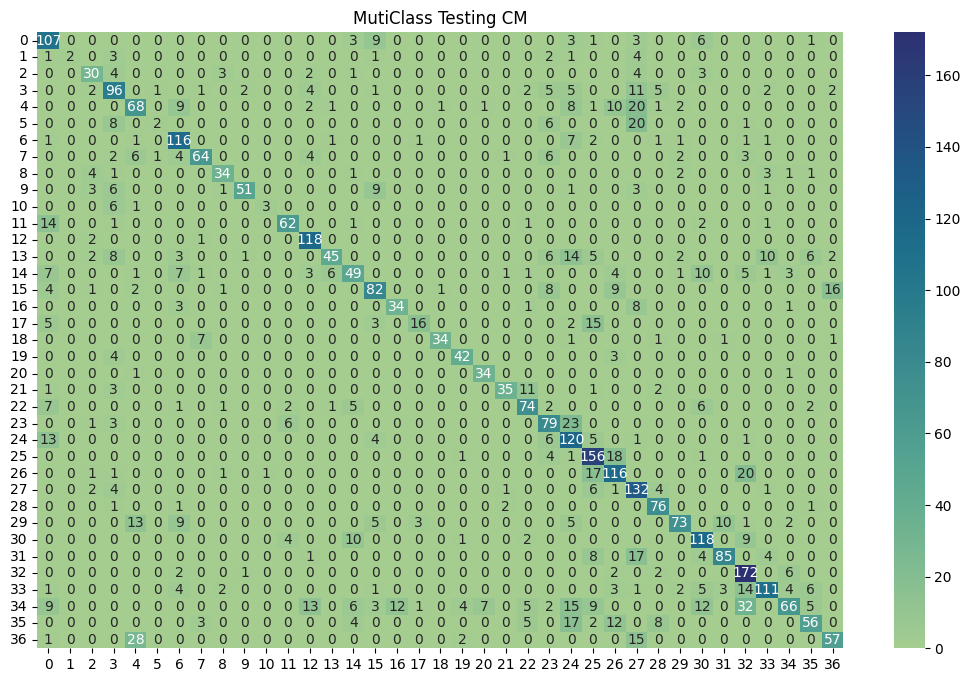

In [ ]:
#Confusion matrix with train data
from matplotlib.colors import XKCD_COLORS
ytp=model.predict(Xt)
ytp =  np.array(y2one(ytp))
from sklearn.metrics import confusion_matrix
fig = plt.subplots(figsize =(13, 8))
plt.title('MutiClass Testing CM')
cm = confusion_matrix(yt, ytp)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")

39/39 [==============================] - 1s 16ms/step


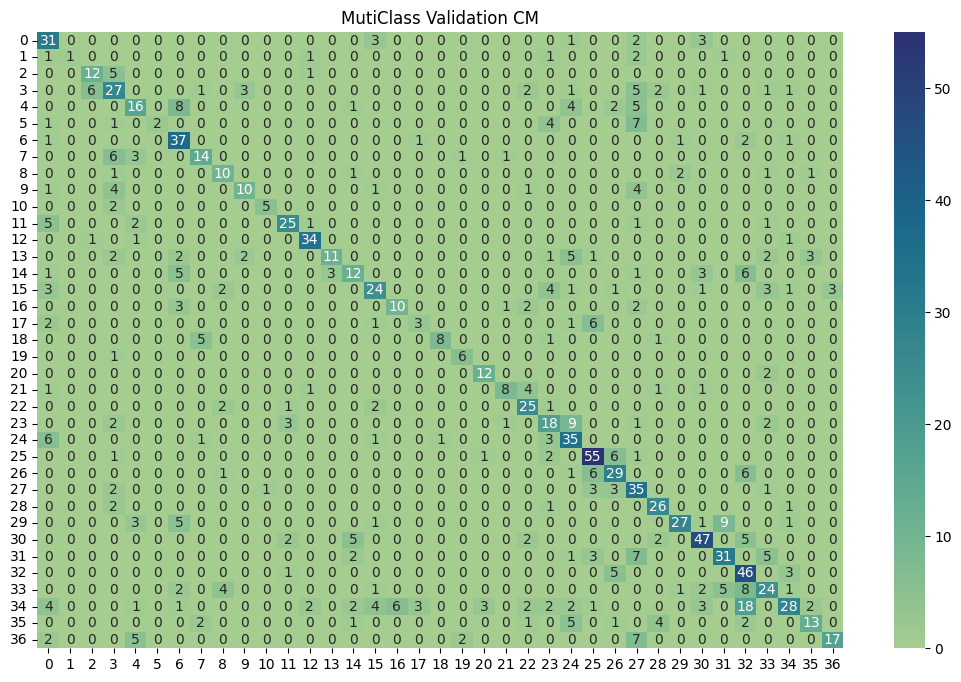

In [ ]:
#Confusion matrix with validation data
yvp=model.predict(Xv)
yvp =  np.array(y2one(yvp))
fig = plt.subplots(figsize =(13, 8))
plt.title('MutiClass Validation CM')
cm = confusion_matrix(yv, yvp)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")

The result is not bad with the muticlass output, but we only care it is attack or not.
How this model does with binary class?

In [ ]:
#This function transfer muticlass output into binary output
def m2b(yi):
  y = yi.copy()
  y[y == 0] = 0
  y[y == 1] = 0
  y[y == 2] = 0
  y[y == 3] = 0
  y[y == 4] = 0
  y[y == 5] = 0
  y[y == 6] = 0
  y[y == 7] = 1
  y[y == 8] = 1
  y[y == 9] = 1
  y[y == 10] = 1
  y[y == 11] = 1
  y[y == 12] = 1
  y[y == 13] = 0
  y[y == 14] = 0
  y[y == 15] = 1
  y[y == 16] = 1
  y[y == 17] = 1
  y[y == 18] = 1
  y[y == 19] = 1
  y[y == 20] = 1
  y[y == 21] = 1
  y[y == 22] = 1
  y[y == 23] = 1
  y[y == 24] = 1
  y[y == 25] = 1
  y[y == 26] = 1
  y[y == 27] = 1
  y[y == 28] = 1
  y[y == 29] = 1
  y[y == 30] = 1
  y[y == 31] = 1
  y[y == 32] = 1
  y[y == 33] = 1
  y[y == 34] = 1
  y[y == 35] = 1
  y[y == 36] = 1
  return y

In [ ]:
ytb = m2b(yt)
yvb = m2b(yv)
ytbp = m2b(ytp)
yvbp = m2b(yvp)

training score is: 0.879, validation score is: 0.866.


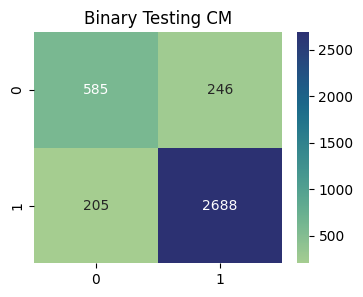

In [ ]:
from sklearn.metrics import accuracy_score
bta = accuracy_score(ytb, ytbp)
bva = accuracy_score(yvb, yvbp)
print('training score is: {:.3f}, validation score is: {:.3f}.'.format(bta, bva))
fig = plt.subplots(figsize =(4, 3))
plt.title('Binary Testing CM')
cm = confusion_matrix(ytb, ytbp)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
from sklearn.metrics import accuracy_score

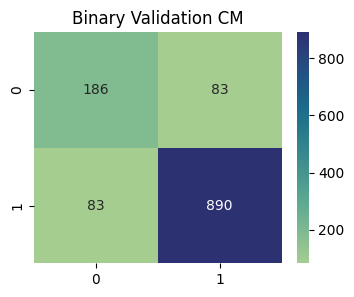

In [ ]:
fig = plt.subplots(figsize =(4, 3))
plt.title('Binary Validation CM')
cm = confusion_matrix(yvb, yvbp)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
from sklearn.metrics import accuracy_score

This model got a 86.6% validation accuracy. The next step is to try to make the model size smaller yet keeping this good accuracy.
## 3.4 One-Shot Pruning

In [ ]:
!pip3 uninstall numpy
!pip3 install numpy==1.23
!pip uninstall tensorflow-model-optimization
!pip install -q tensorflow-model-optimization

from tensorflow import keras
import tensorflow_model_optimization as tfmot
import tempfile

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)
def print_model_weights_sparsity(model):

    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Wrapper):
            weights = layer.trainable_weights
        else:
            weights = layer.weights
        for weight in weights:
            if "kernel" not in weight.name or "centroid" in weight.name:
                continue
            weight_size = weight.numpy().size
            zero_num = np.count_nonzero(weight == 0)
            print(
                f"{weight.name}: {zero_num/weight_size:.2%} sparsity ",
                f"({zero_num}/{weight_size})",
            )

In [ ]:
def prune_the_model_return_history(target):
  prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
  ## Print weights before and after

  # Define model for pruning. 0.5 mean the target sparsity (50%)
  pruning_params = {'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(target, begin_step=0, frequency=100)}
  model = tf.keras.models.load_model('trained_base_model.h5')
  pruned_model = prune_low_magnitude(model, **pruning_params)

  # `prune_low_magnitude` requires a recompile.
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
  pruned_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
  callbacks = [tfmot.sparsity.keras.UpdatePruningStep(),]
  pruned_model.fit(Xt, ytp, epochs=2, validation_split=0.1, callbacks=callbacks)
  stripped_pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)
  stripped_pruned_model.save(str('stripped_'+str(target)+'pruned_model.h5'))
  print_model_weights_sparsity(stripped_pruned_model)
  # Evaluate acc
  yvp = pruned_model.predict(Xv)
  yvp =  np.array(y2one(yvp))
  yvbp = m2b(yvp)
  test_acc_pruned = accuracy_score(yvb, yvbp)

  # Evaluate Inference Time
  startTime = time.time()
  prediction = pruned_model.predict(Xv)
  executionTimePruned = (time.time() - startTime)/len(Xv)
  ## get size 
  pruned_model_size = get_gzipped_model_size(str('stripped_'+str(target)+'pruned_model.h5'))

  # Print
  print('\nPruned Model Accuracy:', test_acc_pruned*100, '%')
  print("Pruned Model Size: %.2f bytes" % (pruned_model_size))
  print("Pruned Inference Time is", executionTimePruned, "s\n\n")
  return pruned_model_size, executionTimePruned, test_acc_pruned
his_size = {}
his_time = {}
his_acc = {}
i = 0


In [ ]:
for t in [0, 0.1, 0.3, 0.5, 0.7, 0.9]:
  his_size[i], his_time[i], his_acc[i] = prune_the_model_return_history(t)
  i = i+1

Epoch 1/2
105/105 [==============================] - 19s 84ms/step - loss: 1.0507 - accuracy: 0.6643 - val_loss: 0.6299 - val_accuracy: 0.7962
Epoch 2/2
105/105 [==============================] - 13s 122ms/step - loss: 0.9376 - accuracy: 0.6908 - val_loss: 0.5622 - val_accuracy: 0.8284


conv1d/kernel:0: 0.00% sparsity  (0/96)
conv1d_1/kernel:0: 0.00% sparsity  (0/3072)
conv1d_2/kernel:0: 0.00% sparsity  (0/6144)
conv1d_3/kernel:0: 0.00% sparsity  (0/12288)
conv1d_4/kernel:0: 0.00% sparsity  (0/24576)
conv1d_5/kernel:0: 0.00% sparsity  (0/49152)
dense/kernel:0: 0.00% sparsity  (0/507904)
dense_1/kernel:0: 0.00% sparsity  (0/4736)
39/39 [==============================] - 1s 18ms/step

Pruned Model Accuracy: 83.65539452495975 %
Pruned Model Size: 2273479.00 bytes
Pruned Inference Time is 0.0010699626904178933 s


Epoch 1/2
105/105 [==============================] - 24s 112ms/step - loss: 1.1499 - accuracy: 0.6461 - val_loss: 2.2891 - val_accuracy: 0.4477
Epoch 2/2
105/105 [==============================] - 12s 109ms/step - loss: 1.3087 - accuracy: 0.5876 - val_loss: 0.7822 - val_accuracy: 0.7212


conv1d/kernel:0: 10.42% sparsity  (10/96)
conv1d_1/kernel:0: 9.99% sparsity  (307/3072)
conv1d_2/kernel:0: 9.99% sparsity  (614/6144)
conv1d_3/kernel:0: 10.00% sparsity  (1229/12288)
conv1d_4/kernel:0: 10.00% sparsity  (2458/24576)
conv1d_5/kernel:0: 10.00% sparsity  (4915/49152)
dense/kernel:0: 10.00% sparsity  (50790/507904)
dense_1/kernel:0: 10.01% sparsity  (474/4736)
39/39 [==============================] - 1s 24ms/step

Pruned Model Accuracy: 80.99838969404188 %
Pruned Model Size: 2141038.00 bytes
Pruned Inference Time is 0.0010716986157084049 s


Epoch 1/2
105/105 [==============================] - 21s 84ms/step - loss: 1.2598 - accuracy: 0.6323 - val_loss: 7.3152 - val_accuracy: 0.0536
Epoch 2/2
105/105 [==============================] - 11s 101ms/step - loss: 3.2459 - accuracy: 0.1850 - val_loss: 2.7200 - val_accuracy: 0.1984


conv1d/kernel:0: 30.21% sparsity  (29/96)
conv1d_1/kernel:0: 30.01% sparsity  (922/3072)
conv1d_2/kernel:0: 30.00% sparsity  (1843/6144)
conv1d_3/kernel:0: 30.00% sparsity  (3686/12288)
conv1d_4/kernel:0: 30.00% sparsity  (7373/24576)
conv1d_5/kernel:0: 30.00% sparsity  (14746/49152)
dense/kernel:0: 30.00% sparsity  (152371/507904)
dense_1/kernel:0: 30.00% sparsity  (1421/4736)
39/39 [==============================] - 1s 16ms/step

Pruned Model Accuracy: 74.7181964573269 %
Pruned Model Size: 1794766.00 bytes
Pruned Inference Time is 0.0010690495203850541 s


Epoch 1/2
105/105 [==============================] - 22s 107ms/step - loss: 1.2643 - accuracy: 0.6159 - val_loss: 5.4520 - val_accuracy: 0.0643
Epoch 2/2
105/105 [==============================] - 8s 80ms/step - loss: 3.3834 - accuracy: 0.1668 - val_loss: 2.9830 - val_accuracy: 0.1769


conv1d/kernel:0: 50.00% sparsity  (48/96)
conv1d_1/kernel:0: 50.00% sparsity  (1536/3072)
conv1d_2/kernel:0: 50.00% sparsity  (3072/6144)
conv1d_3/kernel:0: 50.00% sparsity  (6144/12288)
conv1d_4/kernel:0: 50.00% sparsity  (12288/24576)
conv1d_5/kernel:0: 50.00% sparsity  (24576/49152)
dense/kernel:0: 50.00% sparsity  (253952/507904)
dense_1/kernel:0: 50.00% sparsity  (2368/4736)
39/39 [==============================] - 1s 29ms/step

Pruned Model Accuracy: 76.97262479871175 %
Pruned Model Size: 1400676.00 bytes
Pruned Inference Time is 0.0010974055902969434 s


Epoch 1/2
105/105 [==============================] - 19s 106ms/step - loss: 1.2458 - accuracy: 0.6156 - val_loss: 5.1677 - val_accuracy: 0.0429
Epoch 2/2
105/105 [==============================] - 10s 94ms/step - loss: 3.5035 - accuracy: 0.1385 - val_loss: 3.8750 - val_accuracy: 0.1046


conv1d/kernel:0: 69.79% sparsity  (67/96)
conv1d_1/kernel:0: 69.99% sparsity  (2150/3072)
conv1d_2/kernel:0: 70.00% sparsity  (4301/6144)
conv1d_3/kernel:0: 70.00% sparsity  (8602/12288)
conv1d_4/kernel:0: 70.00% sparsity  (17203/24576)
conv1d_5/kernel:0: 70.00% sparsity  (34406/49152)
dense/kernel:0: 70.00% sparsity  (355533/507904)
dense_1/kernel:0: 70.00% sparsity  (3315/4736)
39/39 [==============================] - 1s 17ms/step

Pruned Model Accuracy: 68.76006441223832 %
Pruned Model Size: 970681.00 bytes
Pruned Inference Time is 0.0010669367708829674 s


Epoch 1/2
105/105 [==============================] - 20s 89ms/step - loss: 1.2189 - accuracy: 0.6243 - val_loss: 3.4656 - val_accuracy: 0.0563
Epoch 2/2
105/105 [==============================] - 16s 157ms/step - loss: 3.7059 - accuracy: 0.0671 - val_loss: 3.4205 - val_accuracy: 0.1046


conv1d/kernel:0: 89.58% sparsity  (86/96)
conv1d_1/kernel:0: 90.01% sparsity  (2765/3072)
conv1d_2/kernel:0: 90.01% sparsity  (5530/6144)
conv1d_3/kernel:0: 90.00% sparsity  (11059/12288)
conv1d_4/kernel:0: 90.00% sparsity  (22118/24576)
conv1d_5/kernel:0: 90.00% sparsity  (44237/49152)
dense/kernel:0: 90.00% sparsity  (457114/507904)
dense_1/kernel:0: 89.99% sparsity  (4262/4736)
39/39 [==============================] - 1s 29ms/step

Pruned Model Accuracy: 78.34138486312399 %
Pruned Model Size: 486639.00 bytes
Pruned Inference Time is 0.0010886165446897251 s




In [ ]:
PSize = []
for key, value in his_size.items():
    PSize.append(value) 

PAcc = []
for key, value in his_acc.items():
    PAcc.append(value) 

print(his_size)
print(his_acc)
print(PSize)
print(PAcc)

{0: 2273479, 1: 2141038, 2: 1794766, 3: 1400676, 4: 970681, 5: 486639}
{0: 0.8365539452495975, 1: 0.8099838969404187, 2: 0.7471819645732689, 3: 0.7697262479871175, 4: 0.6876006441223832, 5: 0.78341384863124}
[2273479, 2141038, 1794766, 1400676, 970681, 486639]
[0.8365539452495975, 0.8099838969404187, 0.7471819645732689, 0.7697262479871175, 0.6876006441223832, 0.78341384863124]


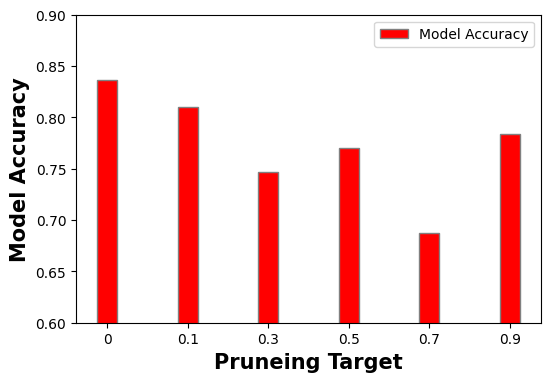

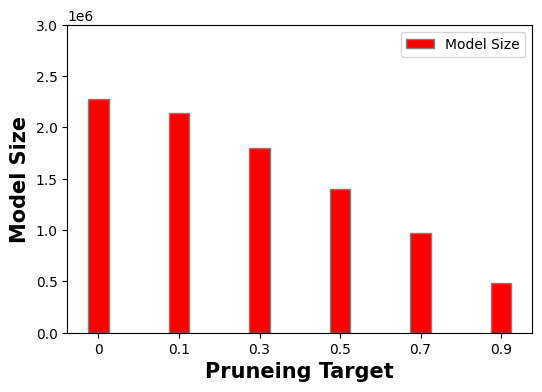

In [ ]:
def bargraphforone(datainput, dataname, xticksinput, label, ylimited):
  barWidth = 0.25
  fig = plt.subplots(figsize =(6, 4))

  
  # Set position of bar on X axis
  br1 = np.arange(len(datainput))
  
  # Make the plot
  plt.bar(br1, datainput, color ='r', width = barWidth, edgecolor ='grey', label =dataname)
  # Adding Xticks
  plt.xlabel(label[0], fontweight ='bold', fontsize = 15)
  plt.ylabel(label[1], fontweight ='bold', fontsize = 15)
  plt.xticks([r for r in range(len(datainput))], xticksinput)
  plt.ylim(ylimited)
  
  plt.legend()
  plt.show()
bargraphforone(PAcc, 'Model Accuracy', ['0', '0.1', '0.3', '0.5', '0.7', '0.9'], ['Pruneing Target', 'Model Accuracy'], [0.6, 0.9])
bargraphforone(PSize, 'Model Size', ['0', '0.1', '0.3', '0.5', '0.7', '0.9'], ['Pruneing Target', 'Model Size'], [0, 3000000])

With 90% pruned, the model size have decrease a lot, yet keeping a almost the same accuracy with only a small decrease.
<br>
## 3.5 Iterative Pruning
Iterative pruning apply pruning to the model through out the processing of traing of the model, compare to one-shot pruning that apply pruning to the model after the model is been trained. This may help the model to maintain a higher accuracy.

In [ ]:
!pip install -q tensorflow-model-optimization

In [ ]:
def iterative_pruning(model, initial_sparsity, final_sparsity, begin_step, end_step, train_data, train_labels, epochs):
  prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

  # Define model for pruning.
  pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=initial_sparsity,
        final_sparsity=final_sparsity, begin_step=begin_step, end_step=end_step, frequency=100)
  }

  pruned_model = prune_low_magnitude(model, **pruning_params)

  # `prune_low_magnitude` requires a recompile.
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
  pruned_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


  callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
  ]

  pruned_model.fit(train_data, train_labels, epochs=epochs, validation_split=0.1, callbacks=callbacks)

  # Strip pruning wrappers
  stripped_pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

  return pruned_model, stripped_pruned_model

In [ ]:
def iterative_prune_the_model_return_history(target, Xt, yt):
  model = tf.keras.models.load_model('trained_base_model.h5')
  prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
  #training sample is 3724, 3724/32*3 = 349, start after 20% train = 70, end at the very end.
  pruned_model, stripped_pruned_model = iterative_pruning(model, 0, target, 70, 349, Xt, yt, 3)
  stripped_pruned_model.save(str('stripped_iterative_'+str(target)+'pruned_model.h5'))
  print_model_weights_sparsity(stripped_pruned_model)
  # Evaluate acc
  yvp = pruned_model.predict(Xv)
  yvp =  np.array(y2one(yvp))
  yvbp = m2b(yvp)
  test_acc_pruned = accuracy_score(yvb, yvbp)

  # Evaluate Inference Time
  startTime = time.time()
  prediction = pruned_model.predict(Xv)
  executionTimePruned = (time.time() - startTime)/len(Xv)
  ## Get model size
  pruned_model_size = get_gzipped_model_size(str('stripped_iterative_'+str(target)+'pruned_model.h5'))

  # Print
  print('\nPruned Model Accuracy:', test_acc_pruned*100, '%')
  print("Pruned Model Size: %.2f bytes" % (pruned_model_size))
  print("Pruned Inference Time is", executionTimePruned, "s\n\n")
  return pruned_model_size, executionTimePruned, test_acc_pruned

In [ ]:
his_size = {}
his_time = {}
his_acc = {}
i = 0
for t in [0.1, 0.3, 0.5, 0.7, 0.9]:
  his_size[i], his_time[i], his_acc[i] = iterative_prune_the_model_return_history(t, Xt, yt)
  i = i+1

Epoch 1/3
105/105 [==============================] - 28s 117ms/step - loss: 1.4269 - accuracy: 0.5175 - val_loss: 0.9523 - val_accuracy: 0.6488
Epoch 2/3
105/105 [==============================] - 8s 79ms/step - loss: 1.3743 - accuracy: 0.5300 - val_loss: 1.0870 - val_accuracy: 0.6515
Epoch 3/3
105/105 [==============================] - 12s 112ms/step - loss: 1.6429 - accuracy: 0.4802 - val_loss: 1.2564 - val_accuracy: 0.5737


conv1d/kernel:0: 9.38% sparsity  (9/96)
conv1d_1/kernel:0: 9.77% sparsity  (300/3072)
conv1d_2/kernel:0: 9.77% sparsity  (600/6144)
conv1d_3/kernel:0: 9.77% sparsity  (1201/12288)
conv1d_4/kernel:0: 9.77% sparsity  (2402/24576)
conv1d_5/kernel:0: 9.77% sparsity  (4804/49152)
dense/kernel:0: 9.77% sparsity  (49637/507904)
dense_1/kernel:0: 9.78% sparsity  (463/4736)
39/39 [==============================] - 1s 17ms/step

Pruned Model Accuracy: 83.97745571658615 %
Pruned Model Size: 2144546.00 bytes
Pruned Inference Time is 0.0010874242598307882 s


Epoch 1/3
105/105 [==============================] - 23s 107ms/step - loss: 1.4323 - accuracy: 0.5022 - val_loss: 0.8916 - val_accuracy: 0.6810
Epoch 2/3
105/105 [==============================] - 9s 84ms/step - loss: 2.1283 - accuracy: 0.3829 - val_loss: 3.1215 - val_accuracy: 0.2011
Epoch 3/3
105/105 [==============================] - 10s 96ms/step - loss: 3.0025 - accuracy: 0.1955 - val_loss: 3.7567 - val_accuracy: 0.1206


conv1d/kernel:0: 29.17% sparsity  (28/96)
conv1d_1/kernel:0: 29.33% sparsity  (901/3072)
conv1d_2/kernel:0: 29.31% sparsity  (1801/6144)
conv1d_3/kernel:0: 29.32% sparsity  (3603/12288)
conv1d_4/kernel:0: 29.32% sparsity  (7205/24576)
conv1d_5/kernel:0: 29.32% sparsity  (14411/49152)
dense/kernel:0: 29.32% sparsity  (148912/507904)
dense_1/kernel:0: 29.33% sparsity  (1389/4736)
39/39 [==============================] - 1s 17ms/step

Pruned Model Accuracy: 77.93880837359099 %
Pruned Model Size: 1804002.00 bytes
Pruned Inference Time is 0.0010728070125487692 s


Epoch 1/3
105/105 [==============================] - 22s 106ms/step - loss: 1.4196 - accuracy: 0.5163 - val_loss: 1.1052 - val_accuracy: 0.5979
Epoch 2/3
105/105 [==============================] - 8s 81ms/step - loss: 2.4415 - accuracy: 0.3572 - val_loss: 5.7764 - val_accuracy: 0.0858
Epoch 3/3
105/105 [==============================] - 11s 103ms/step - loss: 3.3981 - accuracy: 0.1403 - val_loss: 2.8155 - val_accuracy: 0.1769


conv1d/kernel:0: 48.96% sparsity  (47/96)
conv1d_1/kernel:0: 48.86% sparsity  (1501/3072)
conv1d_2/kernel:0: 48.86% sparsity  (3002/6144)
conv1d_3/kernel:0: 48.87% sparsity  (6005/12288)
conv1d_4/kernel:0: 48.86% sparsity  (12009/24576)
conv1d_5/kernel:0: 48.86% sparsity  (24018/49152)
dense/kernel:0: 48.86% sparsity  (248187/507904)
dense_1/kernel:0: 48.86% sparsity  (2314/4736)
39/39 [==============================] - 1s 25ms/step

Pruned Model Accuracy: 75.0402576489533 %
Pruned Model Size: 1416532.00 bytes
Pruned Inference Time is 0.0012767643168352652 s


Epoch 1/3
105/105 [==============================] - 34s 220ms/step - loss: 1.4022 - accuracy: 0.5225 - val_loss: 0.9358 - val_accuracy: 0.6702
Epoch 2/3
105/105 [==============================] - 11s 101ms/step - loss: 2.4240 - accuracy: 0.3587 - val_loss: 3.6123 - val_accuracy: 0.0938
Epoch 3/3
105/105 [==============================] - 17s 161ms/step - loss: 3.4135 - accuracy: 0.1215 - val_loss: 3.3898 - val_accuracy: 0.0831


conv1d/kernel:0: 68.75% sparsity  (66/96)
conv1d_1/kernel:0: 68.42% sparsity  (2102/3072)
conv1d_2/kernel:0: 68.41% sparsity  (4203/6144)
conv1d_3/kernel:0: 68.41% sparsity  (8406/12288)
conv1d_4/kernel:0: 68.41% sparsity  (16813/24576)
conv1d_5/kernel:0: 68.41% sparsity  (33625/49152)
dense/kernel:0: 68.41% sparsity  (347461/507904)
dense_1/kernel:0: 68.41% sparsity  (3240/4736)
39/39 [==============================] - 1s 35ms/step

Pruned Model Accuracy: 77.93880837359099 %
Pruned Model Size: 1002028.00 bytes
Pruned Inference Time is 0.002219852042083003 s


Epoch 1/3
105/105 [==============================] - 36s 174ms/step - loss: 1.4032 - accuracy: 0.5151 - val_loss: 1.1387 - val_accuracy: 0.5791
Epoch 2/3
105/105 [==============================] - 11s 102ms/step - loss: 2.4414 - accuracy: 0.3512 - val_loss: 3.7470 - val_accuracy: 0.0617
Epoch 3/3
105/105 [==============================] - 12s 115ms/step - loss: 3.4929 - accuracy: 0.0910 - val_loss: 3.8937 - val_accuracy: 0.0429


conv1d/kernel:0: 87.50% sparsity  (84/96)
conv1d_1/kernel:0: 87.96% sparsity  (2702/3072)
conv1d_2/kernel:0: 87.96% sparsity  (5404/6144)
conv1d_3/kernel:0: 87.96% sparsity  (10808/12288)
conv1d_4/kernel:0: 87.96% sparsity  (21616/24576)
conv1d_5/kernel:0: 87.96% sparsity  (43233/49152)
dense/kernel:0: 87.96% sparsity  (446736/507904)
dense_1/kernel:0: 87.96% sparsity  (4166/4736)
39/39 [==============================] - 1s 17ms/step

Pruned Model Accuracy: 76.24798711755234 %
Pruned Model Size: 539402.00 bytes
Pruned Inference Time is 0.0006160144836622352 s




In [ ]:
IPSize = []
for key, value in his_size.items():
    IPSize.append(value) 

IPAcc = []
for key, value in his_acc.items():
    IPAcc.append(value) 

print(his_size)
print(his_acc)
print(IPSize)
print(IPAcc)

{0: 2144546, 1: 1804002, 2: 1416532, 3: 1002028, 4: 539402}
{0: 0.8397745571658615, 1: 0.7793880837359098, 2: 0.750402576489533, 3: 0.7793880837359098, 4: 0.7624798711755234}
[2144546, 1804002, 1416532, 1002028, 539402]
[0.8397745571658615, 0.7793880837359098, 0.750402576489533, 0.7793880837359098, 0.7624798711755234]


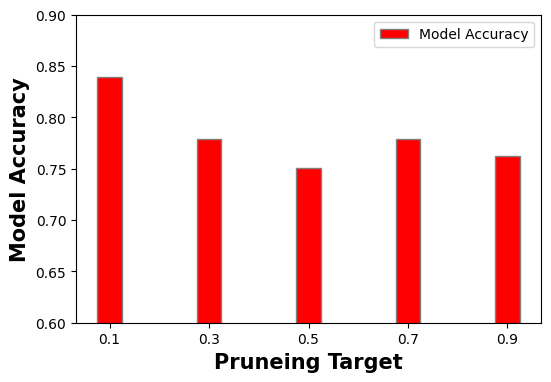

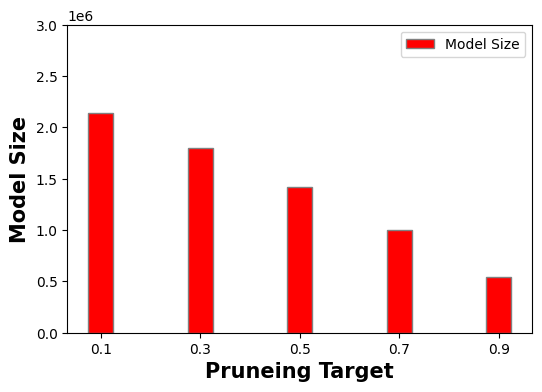

In [ ]:
bargraphforone(IPAcc, 'Model Accuracy', ['0.1', '0.3', '0.5', '0.7', '0.9'], ['Pruneing Target', 'Model Accuracy'], [0.6, 0.9])
bargraphforone(IPSize, 'Model Size', ['0.1', '0.3', '0.5', '0.7', '0.9'], ['Pruneing Target', 'Model Size'], [0, 3000000])

We can see here that overall iterative pruning gave a better result when comparing with one-shot pruning. For this reason, clustering is only going to apply to the iterative pruning model.
##3.6 Iterative pruning followed by sparsity preserving clustering

In [ ]:
def IPC(stripped_pruned_model, train_data, train_labels, test_data, test_labels, target):
  CentroidInitialization = tfmot.clustering.keras.CentroidInitialization.KMEANS_PLUS_PLUS
  print_model_weights_sparsity(stripped_pruned_model)
  from tensorflow_model_optimization.python.core.clustering.keras.experimental import (cluster,)
  cluster_weights = cluster.cluster_weights
  clustering_params = {'number_of_clusters': 16 ,'cluster_centroids_init': CentroidInitialization.KMEANS_PLUS_PLUS , 'preserve_sparsity': True}

  sparsity_clustered_model = cluster_weights(stripped_pruned_model, **clustering_params)

  sparsity_clustered_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

  print('Train sparsity preserving clustering model:')
  sparsity_clustered_model.fit(train_data, train_labels,epochs=3, validation_split=0.1)
  stripped_clusteringed_model = tfmot.clustering.keras.strip_clustering(sparsity_clustered_model)
  converter = tf.lite.TFLiteConverter.from_keras_model(stripped_clusteringed_model)
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  clusteringed_tflite_model = converter.convert()

  # Evaluate ACC
  yvp = sparsity_clustered_model.predict(test_data)
  yvp =  np.array(y2one(yvp))
  yvbp = m2b(yvp)
  test_acc = accuracy_score(test_labels, yvbp)

  # Evaluate Inference Time
  startTime = time.time()
  prediction = sparsity_clustered_model.predict(test_data)
  executionTime = (time.time() - startTime)/len(test_data)

  

  with open(str('scp16_tflite_stripped_iterative_'+str(target)+'pruned_cluster_model.tflite'), 'wb') as f:
    f.write(clusteringed_tflite_model)
  
  ## Get model size 
  model_size = get_gzipped_model_size(str('scp16_tflite_stripped_iterative_'+str(target)+'pruned_cluster_model.tflite'))

  print_model_weights_sparsity(sparsity_clustered_model)
  print('\nCluster Pruned Model Accuracy:', test_acc*100, '%')
  print("Cluster Model Size: %.2f bytes" % (model_size))
  print("Cluster Inference Time is", executionTime, "s\n\n")
  return model_size, executionTime, test_acc

In [ ]:
his_size = {}
his_time = {}
his_acc = {}
i = 0
for t in [0.1, 0.3, 0.5, 0.7]:
  stripped_iterative_model = tf.keras.models.load_model(str('stripped_iterative_'+str(t)+'pruned_model.h5'))
  his_size[i], his_time[i], his_acc[i] = IPC(stripped_iterative_model, Xt, yt, Xv, yvb, t)
  i = i+1

conv1d/kernel:0: 9.38% sparsity  (9/96)
conv1d_1/kernel:0: 9.77% sparsity  (300/3072)
conv1d_2/kernel:0: 9.77% sparsity  (600/6144)
conv1d_3/kernel:0: 9.77% sparsity  (1201/12288)
conv1d_4/kernel:0: 9.77% sparsity  (2402/24576)
conv1d_5/kernel:0: 9.77% sparsity  (4804/49152)
dense/kernel:0: 9.77% sparsity  (49637/507904)
dense_1/kernel:0: 9.78% sparsity  (463/4736)
Train sparsity preserving clustering model:
Epoch 1/3
105/105 [==============================] - 30s 182ms/step - loss: 1.0188 - accuracy: 0.6461 - val_loss: 0.9659 - val_accuracy: 0.6515
Epoch 2/3
105/105 [==============================] - 18s 171ms/step - loss: 0.7379 - accuracy: 0.7204 - val_loss: 0.9030 - val_accuracy: 0.6836
Epoch 3/3
105/105 [==============================] - 21s 203ms/step - loss: 0.6900 - accuracy: 0.7383 - val_loss: 0.9984 - val_accuracy: 0.6595


39/39 [==============================] - 8s 209ms/step
conv1d/kernel:0: 9.38% sparsity  (9/96)
conv1d_1/kernel:0: 9.77% sparsity  (300/3072)
conv1d_2/kernel:0: 9.77% sparsity  (600/6144)
conv1d_3/kernel:0: 9.77% sparsity  (1201/12288)
conv1d_4/kernel:0: 9.77% sparsity  (2402/24576)
conv1d_5/kernel:0: 9.77% sparsity  (4804/49152)
dense/kernel:0: 9.77% sparsity  (49637/507904)
dense_1/kernel:0: 9.78% sparsity  (463/4736)

Cluster Pruned Model Accuracy: 87.52012882447666 %
Cluster Model Size: 306679.00 bytes
Cluster Inference Time is 0.008370515996899197 s




conv1d/kernel:0: 29.17% sparsity  (28/96)
conv1d_1/kernel:0: 29.33% sparsity  (901/3072)
conv1d_2/kernel:0: 29.31% sparsity  (1801/6144)
conv1d_3/kernel:0: 29.32% sparsity  (3603/12288)
conv1d_4/kernel:0: 29.32% sparsity  (7205/24576)
conv1d_5/kernel:0: 29.32% sparsity  (14411/49152)
dense/kernel:0: 29.32% sparsity  (148912/507904)
dense_1/kernel:0: 29.33% sparsity  (1389/4736)
Train sparsity preserving clustering model:
Epoch 1/3
105/105 [==============================] - 32s 196ms/step - loss: 2.4416 - accuracy: 0.2456 - val_loss: 2.3397 - val_accuracy: 0.2627
Epoch 2/3
105/105 [==============================] - 27s 255ms/step - loss: 2.0691 - accuracy: 0.3324 - val_loss: 2.1442 - val_accuracy: 0.2976
Epoch 3/3
105/105 [==============================] - 26s 248ms/step - loss: 1.8902 - accuracy: 0.3870 - val_loss: 2.0443 - val_accuracy: 0.3244


39/39 [==============================] - 3s 70ms/step
conv1d/kernel:0: 29.17% sparsity  (28/96)
conv1d_1/kernel:0: 29.33% sparsity  (901/3072)
conv1d_2/kernel:0: 29.31% sparsity  (1801/6144)
conv1d_3/kernel:0: 29.32% sparsity  (3603/12288)
conv1d_4/kernel:0: 29.32% sparsity  (7205/24576)
conv1d_5/kernel:0: 29.32% sparsity  (14411/49152)
dense/kernel:0: 29.32% sparsity  (148912/507904)
dense_1/kernel:0: 29.33% sparsity  (1389/4736)

Cluster Pruned Model Accuracy: 79.14653784219001 %
Cluster Model Size: 304390.00 bytes
Cluster Inference Time is 0.0022584067450629342 s




conv1d/kernel:0: 48.96% sparsity  (47/96)
conv1d_1/kernel:0: 48.86% sparsity  (1501/3072)
conv1d_2/kernel:0: 48.86% sparsity  (3002/6144)
conv1d_3/kernel:0: 48.87% sparsity  (6005/12288)
conv1d_4/kernel:0: 48.86% sparsity  (12009/24576)
conv1d_5/kernel:0: 48.86% sparsity  (24018/49152)
dense/kernel:0: 48.86% sparsity  (248187/507904)
dense_1/kernel:0: 48.86% sparsity  (2314/4736)
Train sparsity preserving clustering model:
Epoch 1/3
105/105 [==============================] - 26s 177ms/step - loss: 2.3964 - accuracy: 0.2486 - val_loss: 2.2525 - val_accuracy: 0.3244
Epoch 2/3
105/105 [==============================] - 17s 162ms/step - loss: 2.1070 - accuracy: 0.3223 - val_loss: 2.1719 - val_accuracy: 0.3029
Epoch 3/3
105/105 [==============================] - 17s 161ms/step - loss: 1.9350 - accuracy: 0.3605 - val_loss: 2.1150 - val_accuracy: 0.3271


39/39 [==============================] - 7s 171ms/step
conv1d/kernel:0: 48.96% sparsity  (47/96)
conv1d_1/kernel:0: 48.86% sparsity  (1501/3072)
conv1d_2/kernel:0: 48.86% sparsity  (3002/6144)
conv1d_3/kernel:0: 48.87% sparsity  (6005/12288)
conv1d_4/kernel:0: 48.86% sparsity  (12009/24576)
conv1d_5/kernel:0: 48.86% sparsity  (24018/49152)
dense/kernel:0: 48.86% sparsity  (248187/507904)
dense_1/kernel:0: 48.86% sparsity  (2314/4736)

Cluster Pruned Model Accuracy: 77.77777777777779 %
Cluster Model Size: 266115.00 bytes
Cluster Inference Time is 0.008378267288208008 s




conv1d/kernel:0: 68.75% sparsity  (66/96)
conv1d_1/kernel:0: 68.42% sparsity  (2102/3072)
conv1d_2/kernel:0: 68.41% sparsity  (4203/6144)
conv1d_3/kernel:0: 68.41% sparsity  (8406/12288)
conv1d_4/kernel:0: 68.41% sparsity  (16813/24576)
conv1d_5/kernel:0: 68.41% sparsity  (33625/49152)
dense/kernel:0: 68.41% sparsity  (347461/507904)
dense_1/kernel:0: 68.41% sparsity  (3240/4736)
Train sparsity preserving clustering model:
Epoch 1/3
105/105 [==============================] - 31s 235ms/step - loss: 2.6151 - accuracy: 0.2026 - val_loss: 2.5151 - val_accuracy: 0.2225
Epoch 2/3
105/105 [==============================] - 27s 255ms/step - loss: 2.3073 - accuracy: 0.2698 - val_loss: 2.3802 - val_accuracy: 0.2761
Epoch 3/3
105/105 [==============================] - 28s 269ms/step - loss: 2.1284 - accuracy: 0.3202 - val_loss: 2.3532 - val_accuracy: 0.2761


39/39 [==============================] - 3s 66ms/step
conv1d/kernel:0: 68.75% sparsity  (66/96)
conv1d_1/kernel:0: 68.42% sparsity  (2102/3072)
conv1d_2/kernel:0: 68.41% sparsity  (4203/6144)
conv1d_3/kernel:0: 68.41% sparsity  (8406/12288)
conv1d_4/kernel:0: 68.41% sparsity  (16813/24576)
conv1d_5/kernel:0: 68.41% sparsity  (33625/49152)
dense/kernel:0: 68.41% sparsity  (347461/507904)
dense_1/kernel:0: 68.41% sparsity  (3240/4736)

Cluster Pruned Model Accuracy: 77.85829307568439 %
Cluster Model Size: 195610.00 bytes
Cluster Inference Time is 0.004179137724417227 s




In [ ]:
IPCSize = []
for key, value in his_size.items():
    IPCSize.append(value) 

IPCAcc = []
for key, value in his_acc.items():
    IPCAcc.append(value) 

print(his_size)
print(his_acc)
print(IPCSize)
print(IPCAcc)

{0: 306679, 1: 304390, 2: 266115, 3: 195610}
{0: 0.8752012882447665, 1: 0.7914653784219001, 2: 0.7777777777777778, 3: 0.7785829307568438}
[306679, 304390, 266115, 195610]
[0.8752012882447665, 0.7914653784219001, 0.7777777777777778, 0.7785829307568438]


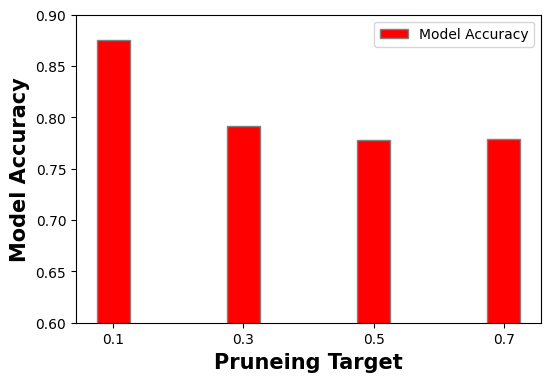

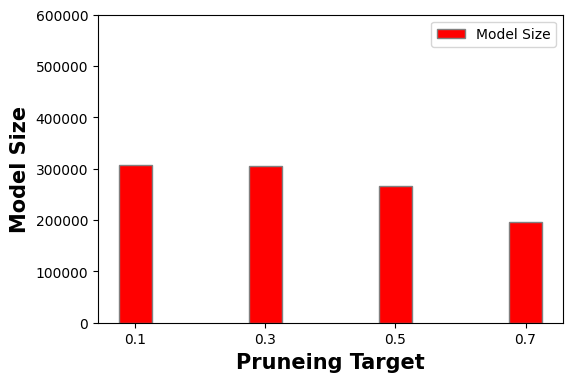

In [ ]:
bargraphforone(IPCAcc, 'Model Accuracy', ['0.1', '0.3', '0.5', '0.7'], ['Pruneing Target', 'Model Accuracy'], [0.6, 0.9])
bargraphforone(IPCSize, 'Model Size', ['0.1', '0.3', '0.5', '0.7'], ['Pruneing Target', 'Model Size'], [0, 600000])

##3.7 Evaluate all optimization method by size and accuracy
we can see that after clustering been applied, model size are much small and even 0.1 cluster iterative pruning have a smaller size than 0.9 pruned model.
<br>
The effect of both pruning and clustering are reducing the model size in exchange of decreasing in accuracy.

39/39 [==============================] - 2s 35ms/step


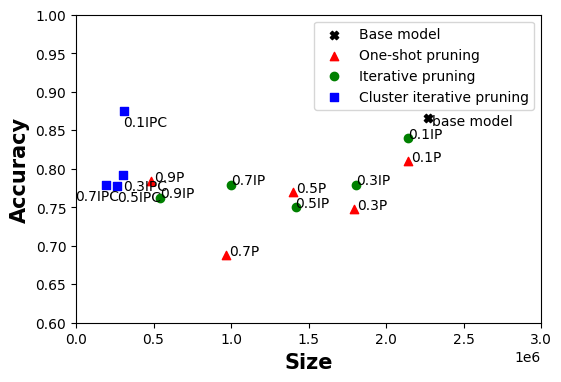

In [ ]:
## Get base model Acc
model = tf.keras.models.load_model('trained_base_model.h5')
yvp = model.predict(Xv)
yvp =  np.array(y2one(yvp))
yvbp = m2b(yvp)
test_acc = accuracy_score(yvb, yvbp)

## Get base model size
stripped_base_model = tfmot.sparsity.keras.strip_pruning(model)
stripped_base_model.save('stripped_base_model.h5')
model_size = get_gzipped_model_size('stripped_base_model.h5')

fig = plt.subplots(figsize =(6, 4)) 
# Make the plot
plt.scatter([model_size], [test_acc], marker='X', color='black', label='Base model')
plt.scatter(PSize[1:], PAcc[1:], marker='^', color='r', label='One-shot pruning')
plt.scatter(IPSize, IPAcc, marker='o', color='g', label='Iterative pruning')
plt.scatter(IPCSize, IPCAcc, marker='s', color='b', label='Cluster iterative pruning')
plt.text(model_size+20000,test_acc-0.01,s='base model', fontdict=dict(color='black',size=10))
i = 1
for s in ['0.1P', '0.3P', '0.5P', '0.7P', '0.9P']:
 plt.text(x=PSize[i]+20000,y=PAcc[i],s=s, fontdict=dict(color='black',size=10))
 i = i+1
i = 0
for s in ['0.1IP', '0.3IP', '0.5IP', '0.7IP', '0.9IP']:
 plt.text(x=IPSize[i],y=IPAcc[i],s=s, fontdict=dict(color='black',size=10))
 i = i+1
i = 0
for s in ['0.1IPC', '0.3IPC', '0.5IPC']:
 plt.text(x=IPCSize[i],y=IPCAcc[i]-0.02,s=s, fontdict=dict(color='black',size=10))
 i = i+1
plt.text(x=IPCSize[3]-200000,y=IPCAcc[3]-0.02,s='0.7IPC', fontdict=dict(color='black',size=10))
# Adding Xticks
plt.xlabel('Size', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.ylim([0.6, 1.0])
plt.xlim([0, 3000000])
plt.legend()
# Show the boundary between the regions:
plt.show()

From this graph, if the 0.1 cluster iterative pruning outlier is dropped.
<br>we can said that is the highest accuracy is still the base model.
<br>Iterative have a better accuracy compare to one-shot pruning and cluster iterative pruning have a smaller size compare to even 0.9 pruning.
<br>If someone wanst to save a little bit of size yet want a high accuracy, 0.1 iterative pruning model should be used. 
<br>If someone wants to save more model size and willing to give up some accuracy, than they should skip 0.3-0.9 iterative pruning and one-shot pruning to choose 0.3 cluster iterative pruning model. Difference in size between 0.3 and other cluster iterative pruning is not large enough to choose them unless the device really can only contain 0.7 cluster iterative pruning model.

#4.0 Conclusion
In the early stage of this project, my goal was to get the highest accuracy with a general model that can make predicting to all data package in the file, but later on with more work been done I realize it is not that easy to do so. I tried two level modeling method and one CNN model. Their result is not great, and I found out in the original paper used it are also getting result for each individual data package. For this reason I move my target to use only one data package and put effort to try to reduce the size of a trained CNN model.
<br>
In section 3 of this report, I study how can clustering and pruning method help reduce the size of model and gave a suggestion on how to choose from these method for a desire accuracy or a model size.
<br>
In the future it is still a good challenge to take on to make a simgle model that can give good pridiction to any dataset that it was given. What could try to do can be transfer learning, or some fed-learning that can better average the difference between each data package.
